<a href="https://colab.research.google.com/github/TaMaN2031A/Data-Science/blob/main/Hands_On_Machine_Learning_with_Scikit_Learn%2C_Keras%2C_and_TensorFlow%2C_3rd_Edition_9781098125967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ageron Book: Main

## Chapter 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [ ]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
X  = lifesat[["GDP per capita (USD)"]]
y = lifesat[["Life satisfaction"]]

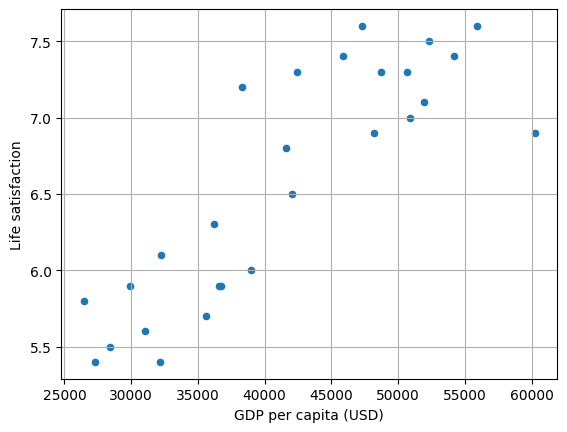

In [ ]:
lifesat.plot(kind="scatter", x="GDP per capita (USD)", y="Life satisfaction", grid=True)
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
X_new = [[37_655.2]]

In [ ]:
print(model.predict(X_new))

[[6.30165767]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(model.predict(X_new))

[[6.33333333]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## Chapter 2

In [7]:
from pathlib import Path
import numpy as np
import urllib.request
import pandas as pd
import tarfile
import urllib

In [8]:
def load_housing_data():
    tarball_path = Path("Datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("Datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)

    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="Datasets")

    csv_path = Path("Datasets/housing/housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


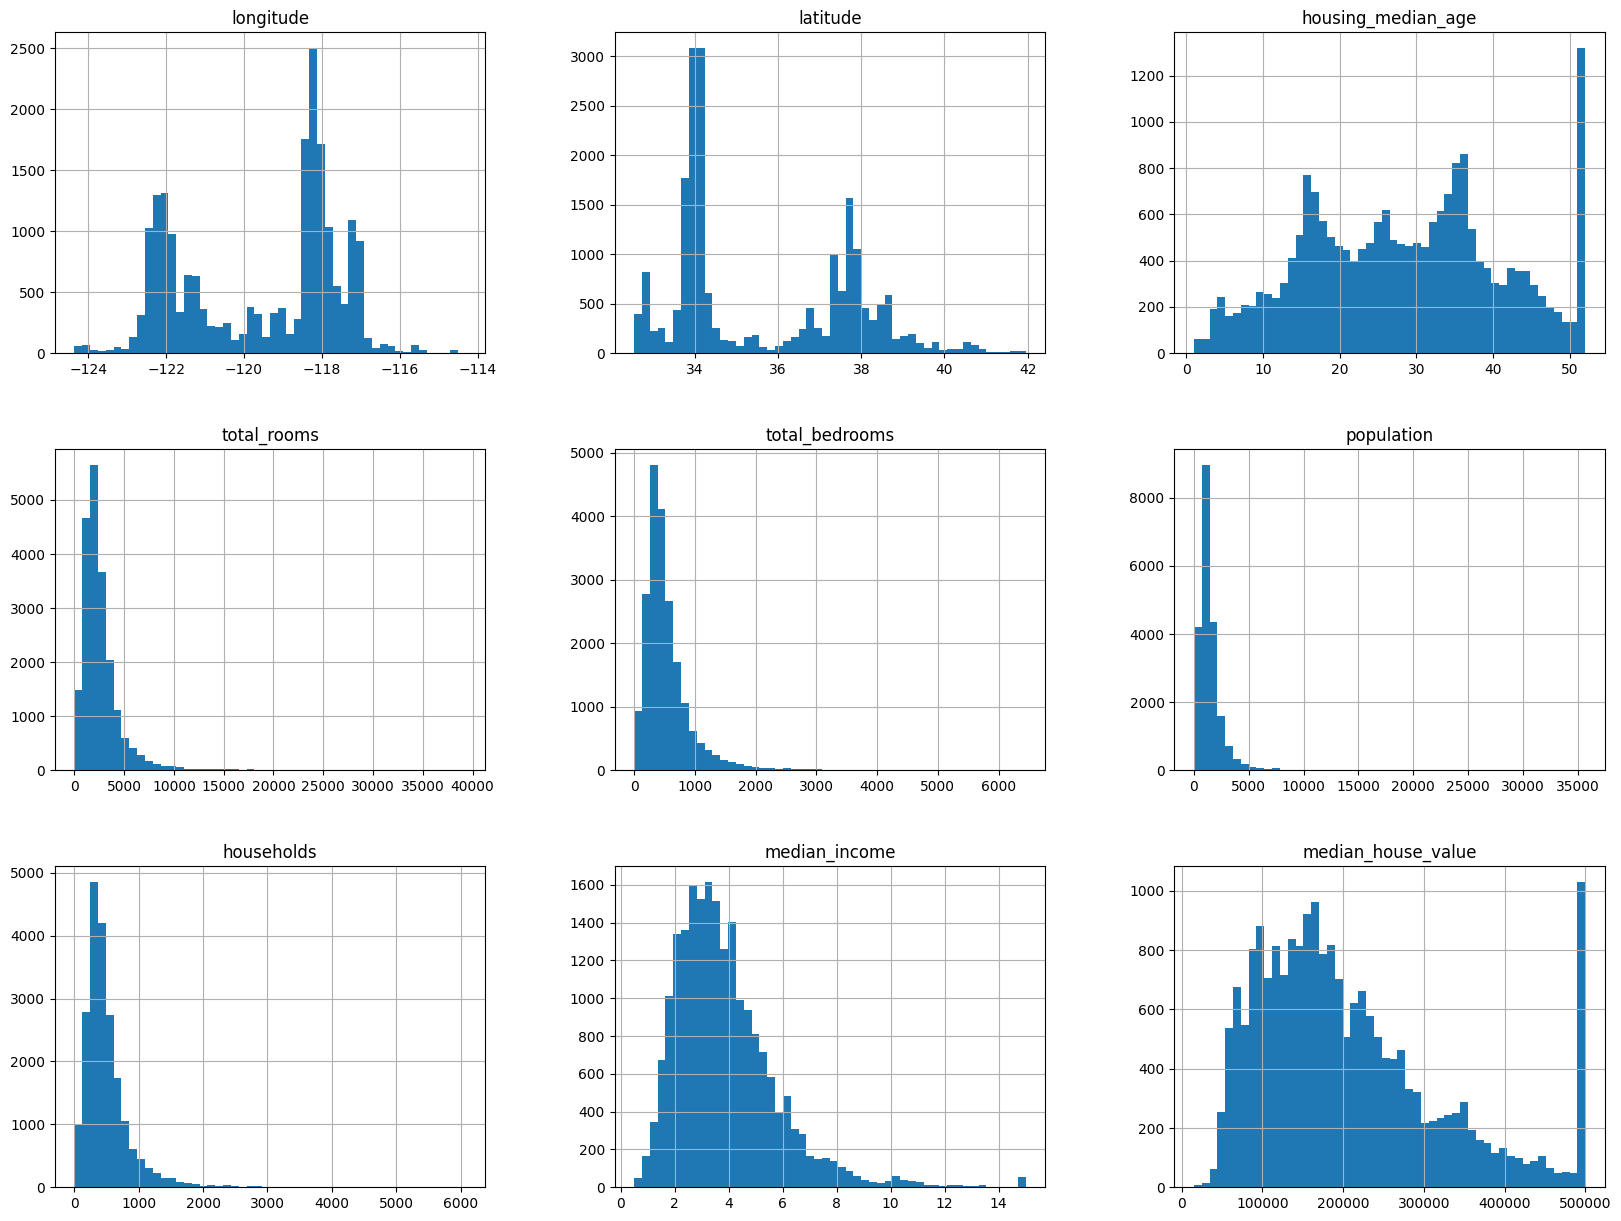

In [13]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# Test-Train split
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set), len(test_set)

(16512, 4128)

المشكلة؟ لة شغلته تاني هيطلعلك مجموعة مختلفة = عملت تحديث للنموذج بيها = سربت بيانات = over fitting  
تستخدم سييد؟ مش حل برده ليه؟ أول ما تحدث البيانات او تجيب بيانات جديدة هتحصل نفس المشاكل  

In [16]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]


المشكلة لازم تتاكد ان مفيش id ديد هيخش يبقى مثل القدام  


In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
# Enhancement if data is small: Stratified Sampling
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [19]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

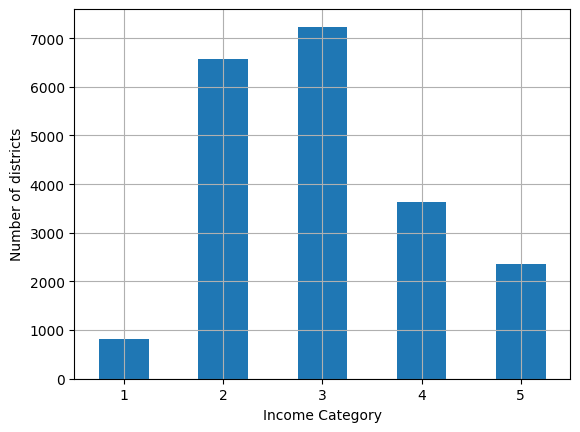

In [20]:
housing["income_cat"].value_counts().sort_index().plot(kind='bar', rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  print(train_index, test_index)
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  strat_splits.append((strat_train_set, strat_test_set))



[13096 14973  3785 ... 19301 19121 19888] [ 3905 16821  2900 ... 16634  9779  3455]
[12898  9367 19304 ...  9356  7535  3261] [11734  3016 19907 ...  5264  9811   993]
[ 1108 13041 14023 ... 14230  3997 15875] [15389  7193 13314 ... 10546 11151 10640]
[20581  1857  9942 ...  1532  1406  3859] [14190  9837 17881 ... 14140 16175  1598]
[ 9346 12457 16765 ...  9305 20087  3928] [16578  3358  1369 ... 14702   495 10955]
[15191 13992 15445 ... 18711 19772  1096] [ 2256 17567  9009 ... 20309  9003 16106]
[ 6408 17079  9105 ...  9124 17358  3215] [ 1980 10719  7725 ... 18893 15186 10560]
[14758 14246  1868 ...   763 12526 16847] [ 1678  1268  8056 ... 11087 20139  1135]
[ 8147 16627  6352 ... 12324 18267 12790] [19338  9719 20036 ...  2553  8616 19450]
[19887  9051  2502 ...  4591  3656  9393] [ 3804 17282 12044 ...  3225 10033  4082]


In [22]:
strat_train_set, strat_test_set = strat_splits[0]

In [23]:
# train_test_split fun can do this for u, but it will need u to create the categorical
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"],
                 random_state=42)

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [25]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

### Explore and Visualize the Data to Gain Insights

In [26]:
# If u wanna start manipulations: make a copy of the orig data so as you don't
# load it from the files over and over again
housing = strat_train_set.copy()

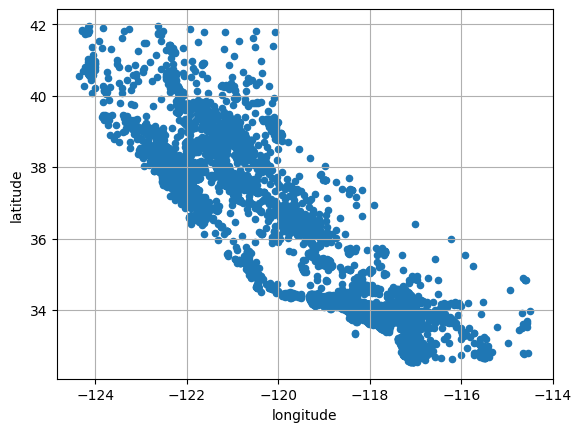

In [27]:
# Just like in the bioinformatics: u need to visualize the data to have an idea over it
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

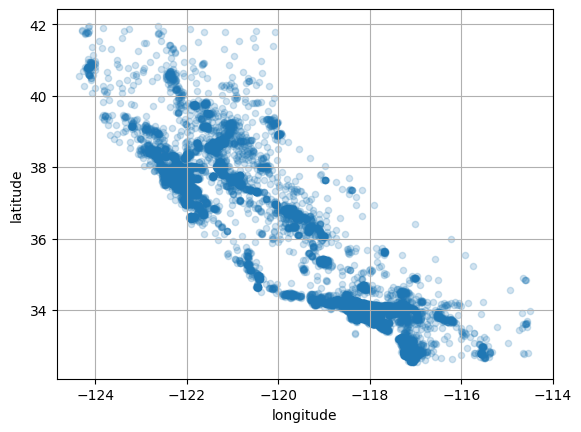

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

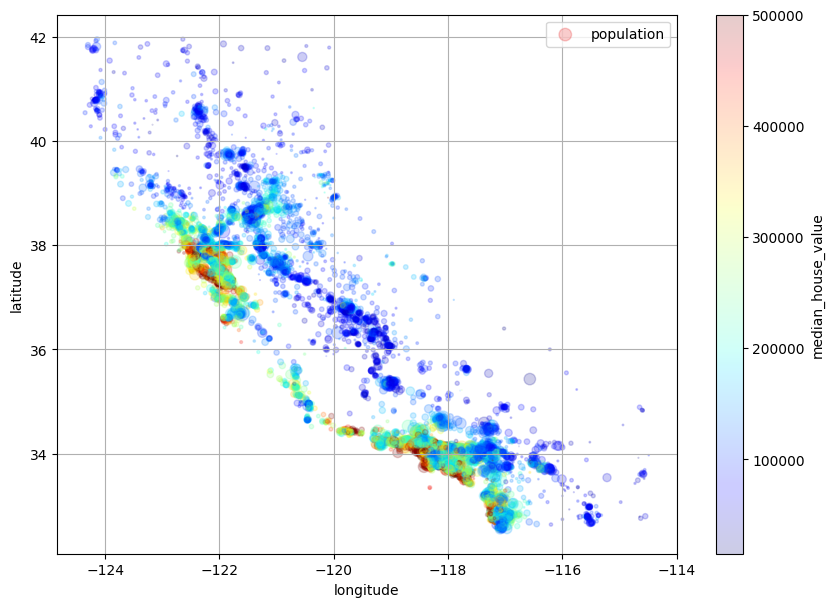

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, alpha=.2,
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             legend=True, sharex=False, figsize=(10,7))


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

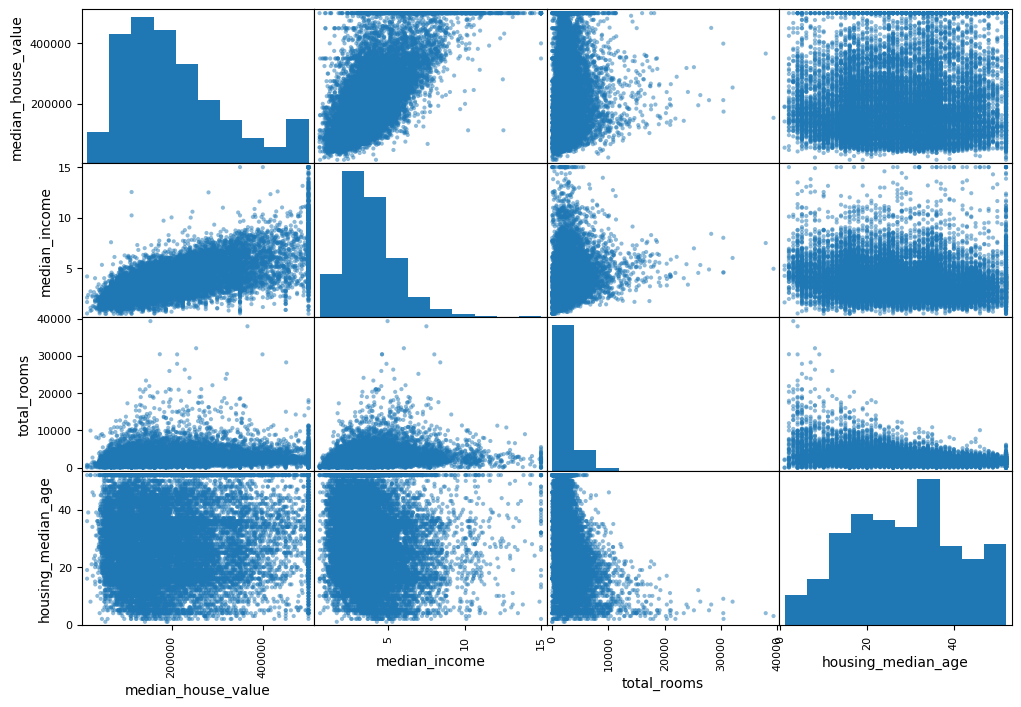

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

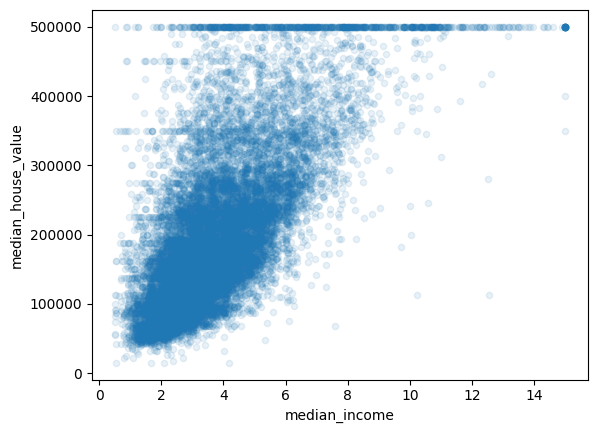

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.1)

### Prepare the Data for Machine Learning Algorithms

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
# Handling NA values (Remove affectd rows, the bad column or imputation)
#housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [35]:
housing_numerical = housing.select_dtypes(include=[np.number])

In [36]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [38]:
housing_numerical.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [39]:
x = imputer.transform(housing_numerical)

In [40]:
housing_tr = pd.DataFrame(x, columns=housing_numerical.columns, index=housing_numerical.index)

### Handling Text and Categorical Attributes

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

المشكلة في التمثيل السايق انه هيخلي النموذج يعتقد ان الألجورذمات القريبة من بعدها في القيمة = 2 و 3 مثلا
هم قريبين من بعض فعلا: فما الحل اذن؟ وان هوت انكودنج

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [46]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", 'NEAR BAY']})

In [47]:
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [ ]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

ما يميز السكيليرنية عن اختها الباندية هو الذاكرة الحاضرة عند الأولى؛ فهي تتذكر ما تم تدريبها عليه

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test).toarray(), columns=cat_encoder.get_feature_names_out())

### Feature Scaling and Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_numerical)

In [ ]:
housing_num_min_max_scaled[:10]

array([[-0.60851927,  0.11702128,  1.        , -0.83117147, -0.64116605,
        -0.80701754, -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, -0.90014752, -0.88629409,
        -0.91866029, -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, -0.94501246, -0.93042358,
        -0.93141946, -0.92458466, -0.73336919],
       [ 0.46855984, -0.74468085, -0.37254902, -0.78778168, -0.7262039 ,
        -0.77401546, -0.70916558, -0.75698266],
       [ 0.25760649, -0.74042553,  0.37254902, -0.77801516, -0.6102432 ,
        -0.76579561, -0.56281501, -0.58217128],
       [-0.38336714,  0.15106383,  1.        , -0.90706547, -0.90336608,
        -0.91522513, -0.88127683, -0.60735714],
       [ 0.21501014, -0.72340426,  0.29411765, -0.94485986, -0.93686584,
        -0.93792173, -0.9413851 , -0.22574861],
       [-0.54969574,  0.03404255,  0.37254902, -0.75660003, -0.71042036,
        -0.7502147 , -0.66809782, -0.32326451],
       [ 0.19878296, -0.62553191

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_numerical)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing_numerical[["housing_median_age"]], [[35.]])
age_simil_35

array([[3.08244070e-126],
       [1.38879439e-011],
       [1.83156389e-002],
       ...,
       [6.33097734e-211],
       [1.83156389e-002],
       [6.63967720e-036]])

In [ ]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
target_scaler.inverse_transform(scaled_predictions)

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [ ]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [ ]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35]], gamma =0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean

  def fit(self, X, y=None):
    X = check_array(X)
    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X - self.mean_
    return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    self.Kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.Kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.Kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
similarities[0]

array([7.76542973e-17, 9.79800335e-01, 5.48714294e-08, 1.39802338e-23,
       9.63314534e-04, 1.37867731e-04, 1.27105542e-01, 5.54756787e-01,
       4.68660945e-14, 5.60181642e-01])

In [ ]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [ ]:
import sklearn
sklearn.set_config(display="diagram")

In [ ]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [ ]:
# if u don't want to name anything
from sklearn.pipeline import make_pipeline
num_pipelin_without_names = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
num_pipelin_without_names

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_numerical)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
                                       index=housing_numerical.index)


In [ ]:
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [ ]:
num_pipeline[0]

SimpleImputer(strategy='median')

In [ ]:
num_pipelin_without_names[0]

SimpleImputer(strategy='median')

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
               "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [ ]:
from sklearn.compose import make_column_selector
preprocessing_pp = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
])

In [ ]:
preprocessing_pp

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f809f8920>),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f809fa930>)])

In [ ]:
housing_prepared = preprocessing_pp.fit_transform(housing)

In [ ]:
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing_pp.get_feature_names_out(),
                                       index=housing.index)

In [ ]:
df_housing_prepared

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Whole preprocessing pipeline
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
preprocessing = ColumnTransformer(
    [
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
    ], remainder=default_num_pipeline)


In [ ]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7d0f8174a480>,
                                                                      func=<function column_ratio...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo',
                                 ClusterSimilarity(gamma=1, random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f83f50da0>)])

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d0...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f83f50da0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions)

In [ ]:
from math import sqrt

sqrt(lin_rmse)

68972.88910758484

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d0...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d0f83f50da0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions__ = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions__)

In [ ]:
sqrt(tree_rmse)

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv=10)

In [ ]:
tree_rmses

array([64607.89604624, 66409.0627187 , 66203.41031283, 65863.76434319,
       68086.79141027, 66534.53308312, 66923.49892937, 68532.21066423,
       66367.48227837, 66208.69621463])

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66573.734600
std,1103.402323
min,64607.896046
25%,66204.731788
50%,66388.272499
75%,66826.257468
max,68532.210664


In [ ]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring = "neg_root_mean_squared_error", cv=10)

In [ ]:
lin_rmses

array([69857.22858234, 68416.6472971 , 65504.76575251, 81037.86374147,
       69063.09688723, 68424.89361011, 67952.06647592, 71179.43136955,
       68090.53867535, 70507.51578923])

In [ ]:
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,70003.404818
std,4182.188328
min,65504.765753
25%,68172.065831
50%,68743.995249
75%,70344.943988
max,81037.863741


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)


KeyboardInterrupt: 

In [ ]:
pd.Series(forest_rmses).describe()

In [ ]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
    'random_forest__max_features': [4, 6, 8]},

   {'preprocessing__geo__n_clusters': [10, 15],
    'random_forest__max_features': [6, 8, 10]},
]


In [ ]:
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.cv_results_

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs, n_iter=10,
cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

In [ ]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

In [ ]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()


In [ ]:
final_predictions = final_model.predict(X_test)

In [ ]:
final_rmse = mean_squared_error(y_test, final_predictions)
print(final_rmse)

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

## Chapter 3

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

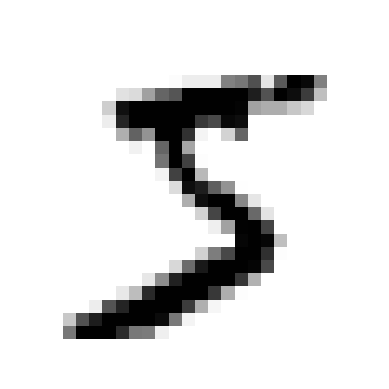

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(X[0])

In [ ]:
y[0]

'5'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([X_train[0]])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

### Implementing Cross-validation

In [ ]:
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

"""

'\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.base import clone\n\nskfolds = StratifiedKFold(n_splits=3)\n\nfor train_index, test_index in skfolds.split(X_train, y_train_5):\n    clone_clf = clone(sgd_clf)\n    X_train_folds = X_train[train_index]\n    y_train_folds = y_train_5[train_index]\n    X_test_fold = X_train[test_index]\n    y_test_fold = y_train_5[test_index]\n\n    clone_clf.fit(X_train_folds, y_train_folds)\n    y_pred = clone_clf.predict(X_test_fold)\n    n_correct = sum(y_pred == y_test_fold)\n    print(n_correct / len(y_pred))\n\n'

### Confusion Matrices

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
# The first row of this matrix considers non-5 images (the negative class)

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Now our 5-detector does not look as shiny as it did when we looked at its accuracy. When it claims an image represents a 5, it is correct only 83.7% of
the time. Moreover, it only detects 65.1% of the 5s.  
The F1 score favors classifiers that have similar precision and recall. This is not
always what you want: in some contexts you mostly care about precision, and
in other contexts you really care about recall. For example, if you trained a
classifier to detect videos that are safe for kids, you would probably prefer a
classifier that rejects many good videos (low recall) but keeps only safe ones
(high precision), rather than a classifier that has a much higher recall but lets a
few really bad videos show up in your product (in such cases, you may even
want to add a human pipeline to check the classifier’s video selection). On the
other hand, suppose you train a classifier to detect shoplifters in surveillance
images: it is probably fine if your classifier only has 30% precision as long as it
has 99% recall (sure, the security guards will get a few false alerts, but almost
all shoplifters will get caught).
Unfortunately, you can’t have it both ways: increasing precision reduces recall,
and vice versa. This is called the precision/recall trade-off.

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
y_scores = sgd_clf.decision_function([X_train[0]])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the preceding code returns the same result as the predict() method (i.e., True).

In [ ]:
# raising the threshold => decreases recall (it becomes harder to be a positive)
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
precisions, recalls, thresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

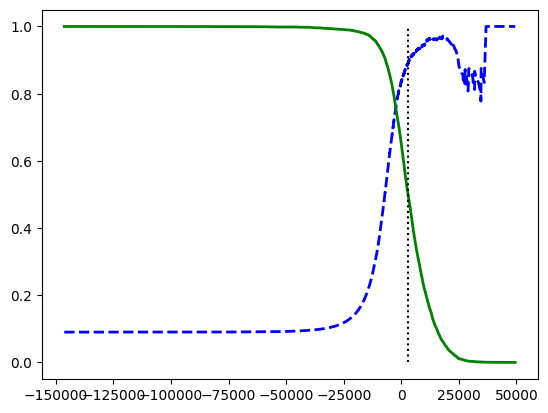

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

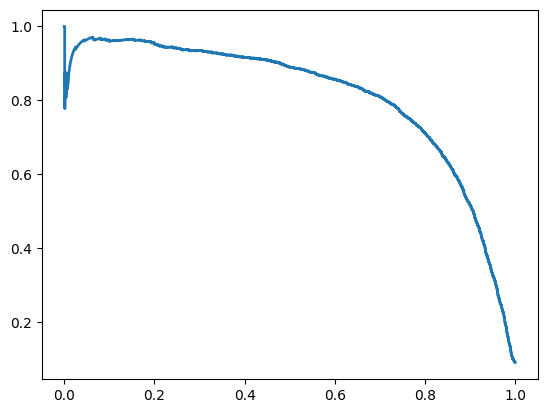

In [ ]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

In [ ]:
idx_for_90_precision = (precisions >= 0.9).argmax()
print(len(precisions), idx_for_90_precision)

60001 57109


In [ ]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [ ]:
# Here is how to use this threshold to predict
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

If someone says, “Let’s reach 99% precision”, you should ask, “At what
recall[cost]?”

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


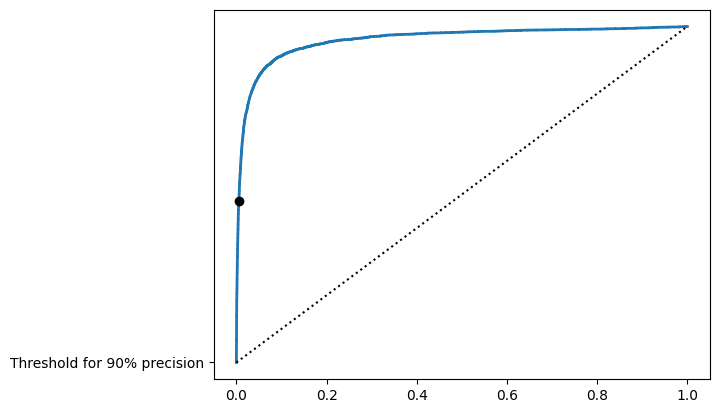

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", "Threshold for 90% precision")
plt.show()

In [ ]:
# Area under the curve => closer to one the bitter
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [ ]:
# Pure random classifier => 0.5
roc_auc_score(y_train_5, dummy_clf.predict(X_train))

np.float64(0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [ ]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

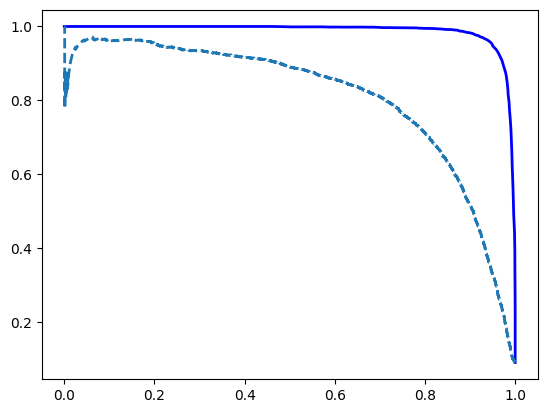

In [ ]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.show()

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
y_train_pred_forest

array([ True, False, False, ...,  True, False, False])

In [ ]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
print(roc_auc_score(y_train_5, y_train_pred_forest))

0.9358174809192218


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [ ]:
svm_clf.decision_function([X_train[0]]).round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Logistic reg, random forest, gaussian NB :  Can be multi class classifiers
SGD, SVC: Binary only

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
len(ovr_clf.estimators_)


10

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [ ]:
len(ovo_clf.estimators_)

45

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
sgd_clf.predict([X_train[0]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", verbose=1)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))


In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

### Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",
                                        values_format=".0%")
plt.show()

In [ ]:
# Count those who are incorrect only
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true",
                                        sample_weight=sample_weight,
                                        values_format=".0%")
plt.show()

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="pred",
                                        sample_weight=sample_weight,
                                        values_format=".0%")
plt.show()

### Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train_large

array([False, False, False, ..., False, False,  True])

In [ ]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([X_train[0]])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

This approach assumes that all labels are equally important, which may not be
the case. In particular, if you have many more pictures of Alice than of Bob or
Charlie, you may want to give more weight to the classifier’s score on pictures
of Alice

In [ ]:
 f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

Here weighted is almost identitical to macro since classes (odd true vs odd false) are qually distributed, large is almost equally distributed also

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([X_train[0]])

array([[0., 1.]])

### Multioutput Classification (Multilabel + Multivalues per label)

اني اشيل دوشة ده يعتبر مثال على هذه المسألة
عند س بكسل؛ كل بكسل لها ص قيمة

The line between classification and regression is sometimes blurry, such
as in this example. Arguably, predicting pixel intensity is more akin to
regression than to classification. Moreover, multioutput systems are not
limited to classification tasks; you could even have a system that outputs
multiple labels per instance, including both class labels and value labels.

> شرح الكتاب



In [ ]:
import numpy as np

np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

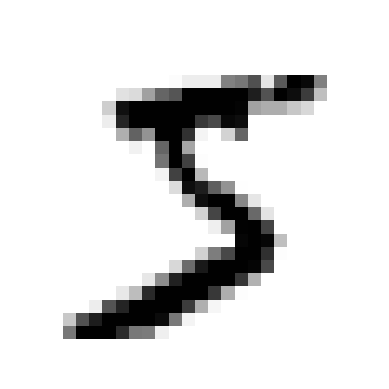

In [ ]:
plot_digit(X_train[0])

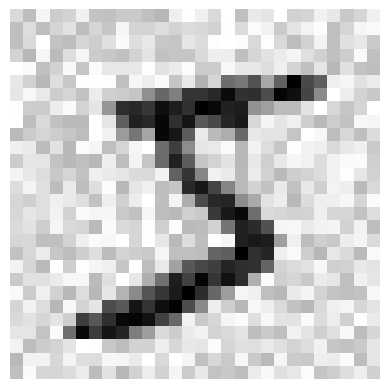

In [ ]:
plot_digit(X_train_mod[0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

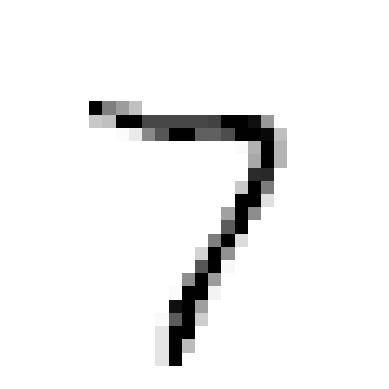

In [ ]:
plot_digit(knn_clf.predict([X_test_mod[0]]))

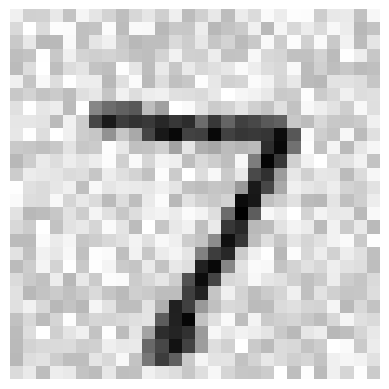

In [ ]:
plot_digit(X_test_mod[0])

### Exercise

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_97 = KNeighborsClassifier()
knn_clf_97.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(knn_clf_97, X_train, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

In [ ]:
y_test_pred = knn_clf_97.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9688

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'weights':['uniform', 'distance'], 'n_neighbors':list(range(1, 10, 2))}

grid_search = GridSearchCV(knn_clf_97, parameters, cv=3, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.35021186, 0.24645607, 0.22673933, 0.24936096, 0.28359946,
        0.27398984, 0.22536588, 0.24384514, 0.24256698, 0.24384308]),
 'std_fit_time': array([0.13179695, 0.02823989, 0.00885062, 0.02933718, 0.08404552,
        0.02520216, 0.00221301, 0.02599073, 0.02819431, 0.02855157]),
 'mean_score_time': array([62.4136049 , 61.54920141, 58.99596842, 58.79693158, 61.22777836,
        62.77887686, 60.38404441, 59.9352115 , 59.4525826 , 58.18708396]),
 'std_score_time': array([3.35631624, 2.38602006, 1.18933015, 1.10953726, 1.11580946,
        2.91299519, 0.80988918, 1.38065715, 1.55089989, 0.70402081]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance',
        

In [ ]:
knn_clf_97_distance_3 = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf_97_distance_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_test_pred_97_dis_3 = knn_clf_97_distance_3.predict(X_test)


KeyboardInterrupt: 

In [ ]:
accuracy_score(y_test, y_test_pred_97_dis_3)
# تمت بحمد الله

0.9717

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
import numpy as np

In [ ]:
def shift_up(x):
  xp = np.zeros(784)
  for i in range(27):
      for j in range(28):
        xp[i*28+j] = x[(i+1)*28 + j]
  return xp

def shift_down(x):
  xp = np.zeros(784)
  for i in range(1, 28):
      for j in range(28):
        xp[i*28+j] = x[(i-1)*28 + j]
  return xp

def shift_left(x):
  xp = np.zeros(784)
  for i in range(28):
      for j in range(28-1):
        xp[i*28+j] = x[(i)*28 + j + 1]
  return xp

def shift_right(x):
  xp = np.zeros(784)
  for i in range(28):
      for j in range(1, 28):
        xp[i*28+j] = x[(i)*28 + j - 1]
  return xp

In [ ]:
X_train[0].shape

(784,)

In [ ]:
def expand(X_train, y_train):
    expanded_x, expanded_y = [], []
    for (i, j) in zip(X_train, y_train):
        expanded_x.append(i)
        expanded_x.append(shift_down(i))
        expanded_x.append(shift_up(i))
        expanded_x.append(shift_left(i))
        expanded_x.append(shift_right(i))
        expanded_y.append(j);expanded_y.append(j);expanded_y.append(j);expanded_y.append(j);
        expanded_y.append(j);

    return np.array(expanded_x), np.array(expanded_y)

In [ ]:
X_train_aug, y_train_aug = expand(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape, X_train_aug.shape, y_train_aug.shape

((60000, 784), (60000,), (300000, 784), (300000,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_97_distance_3_aug = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf_97_distance_3_aug.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_test_pred_aug = knn_clf_97_distance_3_aug.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred_aug)
# زادت الدقة بمقدار 005 الحمد لله

0.9763

 ### Titanic Kaggle

In [ ]:
from sklearn.datasets import fetch_openml

titanic = fetch_openml("titanic", version=1, as_frame=True)

In [ ]:
titanic["DESCR"]

'**Author**: Frank E. Harrell Jr., Thomas Cason  \n**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  \n**Please cite**:   \n\nThe original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.\n\nThomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new v

In [ ]:
titanic["data"]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
X, y = titanic.data, titanic.target

In [ ]:
X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
y

,survived
0,1
1,1
2,0
3,0
4,0
...,...
1304,0
1305,0
1306,0
1307,0


In [ ]:
X.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


*   We'll impute the age with median
*   Names are not important attribute
*   sisp and parch will be tried at first, if no effect on model we'll drop them
*   The fair is to be used, as it indicates the richness of users, which could sy something about the places they were staying at in the ship
*   embarkd, gender and home.dest will be used and encoded
*   cabin, ticket, boat and body will be ignored also for the huge number of nulls


In [ ]:
X['home.dest'].value_counts()

,count
home.dest,
"New York, NY",64
London,14
"Montreal, PQ",10
"Cornwall / Akron, OH",9
"Paris, France",9
...,...
"Union Hill, NJ",1
"London New York, NY",1
"Austria Niagara Falls, NY",1


In [ ]:
X['home.dest'].value_counts().to_csv("home_dest_counts.csv", header=True)

In [ ]:
X['home.dest'] = X['home.dest'].str.rsplit(',', n=1).str[-1].str.strip()

/tmp/ipython-input-2853010189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['home.dest'] = X['home.dest'].str.rsplit(',', n=1).str[-1].str.strip()


In [ ]:
X['home.dest'].value_counts()

,count
home.dest,
NY,166
NJ,36
England,35
MA,34
MI,33
...,...
Finland New York,1
Birmingham,1
Croatia,1


In [ ]:
X['home.dest'].value_counts().to_csv("home_dest_counts_mod.csv", header=True)

In [ ]:
X['embarked'].value_counts()

,count
embarked,
S,914
C,270
Q,123


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", MinMaxScaler()),
])
cat_pipeline = Pipeline([("impute", SimpleImputer(strategy="most_frequent")),
                             ("encode", OneHotEncoder(handle_unknown="ignore"))])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ['age', 'sibsp', 'parch', 'fare']
cat_attribs = ['sex', 'pclass', 'embarked', 'home.dest']

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [ ]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  MinMaxScaler())]),
                                 ['age', 'sibsp', 'parch', 'fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'pclass', 'embarked', 'home.dest'])])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'pclass', 'embarked',
                                                   'home.dest'])])),
                ('linearregression', LinearRegression())])

In [ ]:
# نقرأ الملف الخام
with open("test.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# نشيل الـ double quotes حوالين السطر كله
cleaned = [line.strip().strip('"') for line in lines]

# نحفظه في ملف جديد
with open("clean.csv", "w", encoding="utf-8") as f:
    f.write("\n".join(cleaned))


In [ ]:
X_test = pd.read_csv("clean.csv")
print(X_test.head())


     PassengerId    pclass                                   Name     sex  \
892            3     Kelly                            Mr. James""    male   
893            3    Wilkes             Mrs. James (Ellen Needs)""  female   
894            2     Myles                   Mr. Thomas Francis""    male   
895            3      Wirz                           Mr. Albert""    male   
896            3  Hirvonen   Mrs. Alexander (Helga E Lindqvist)""  female   

      age  sibsp  parch   ticket     fare cabin embarked  
892  34.5      0      0   330911   7.8292   NaN        Q  
893  47.0      1      0   363272   7.0000   NaN        S  
894  62.0      0      0   240276   9.6875   NaN        Q  
895  27.0      0      0   315154   8.6625   NaN        S  
896  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
X_test_DD = X_test.reindex(columns=X.columns, fill_value=0)


In [ ]:
X_test_DD

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
892,Kelly,0,male,34.5,0,0,330911,7.8292,NaN,Q,0,0,0
893,Wilkes,0,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0
894,Myles,0,male,62.0,0,0,240276,9.6875,NaN,Q,0,0,0
895,Wirz,0,male,27.0,0,0,315154,8.6625,NaN,S,0,0,0
896,Hirvonen,0,female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Spector,0,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,0
1306,Oliva y Ocana,0,female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0
1307,Saether,0,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0
1308,Ware,0,male,NaN,0,0,359309,8.0500,NaN,S,0,0,0


#### Choosing the Right Classifier

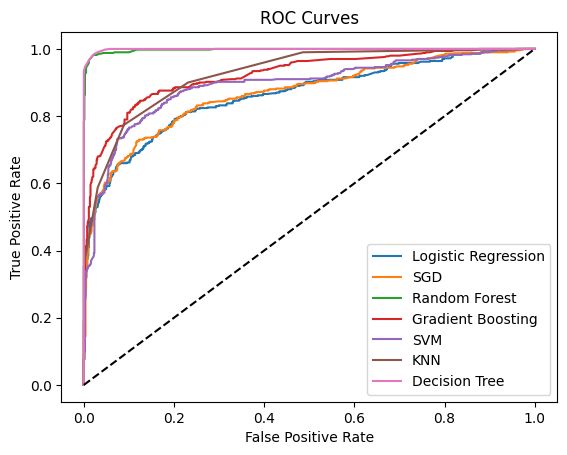

            Classifier  Accuracy  Precision  Recall        F1       AUC
0  Logistic Regression  0.805195   0.758985   0.718  0.737924  0.861633
1                  SGD  0.817418   0.809976   0.682  0.740499  0.866454
2        Random Forest  0.980138   0.981707   0.966  0.973790  0.997423
3    Gradient Boosting  0.864782   0.867882   0.762  0.811502  0.923258
4                  SVM  0.816654   0.880117   0.602  0.714964  0.891309
5                  KNN  0.858671   0.843137   0.774  0.807091  0.925342
6        Decision Tree  0.980138   0.981707   0.966  0.973790  0.998983


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline

# مصنفات مختلفة
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD": SGDClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),   # probability=True عشان ROC
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, clf in classifiers.items():
    pipe = make_pipeline(preprocessing, clf)
    pipe.fit(X, y)

    y_pred = pipe.predict(X)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X)[:,1]
    else:
        try:
            y_proba = pipe.decision_function(X)
        except:
            y_proba = None

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y.astype(int), y_pred.astype(int))
    rec = recall_score(y.astype(int), y_pred.astype(int))
    f1 = f1_score(y.astype(int), y_pred.astype(int))
    auc = roc_auc_score(y.astype(int), y_proba) if y_proba is not None else None

    results.append([name, acc, prec, rec, f1, auc])

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y.astype(int), y_proba)
        plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],"k--")  # خط عشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

df_results = pd.DataFrame(results, columns=["Classifier","Accuracy","Precision","Recall","F1","AUC"])
print(df_results)


In [ ]:
clf = DecisionTreeClassifier()
pipe = make_pipeline(preprocessing, clf)
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'pclass', 'embarked',
                                                   'home.dest'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
pipe.predict(X_test_DD)

array(['0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0

In [ ]:
import pandas as pd

y_pred = pipe.predict(X_test_DD)

submission = pd.DataFrame({
    "PassengerId": X_test_DD.index,
    "Survived": y_pred
})

submission.to_csv("submission.csv", index=False)

print("تم حفظ الملف submission.csv")
print(submission.head())


تم حفظ الملف submission.csv
   PassengerId Survived
0          892        0
1          893        1
2          894        0
3          895        0
4          896        1


In [ ]:
pipe = make_pipeline(preprocessing, RandomForestClassifier())
pipe.fit(X, y)

y_pred = pipe.predict(X_test_DD)

submission = pd.DataFrame({
    "PassengerId": X_test_DD.index,
    "Survived": y_pred
})

submission.to_csv("submission_Random.csv", index=False)

print("تم حفظ الملف submission.csv")
print(submission.head())


تم حفظ الملف submission.csv
   PassengerId Survived
0          892        0
1          893        1
2          894        0
3          895        0
4          896        1


### Spam filter

## Chapter 4: Training Models

### Linear Regression: The Normal Equation and Linear Regression

In [3]:
import numpy as np

np.random.seed(42)

In [4]:
m = 100 # Number of samples
X = 2 * np.random.rand(m, 1) # Column vector
y = 4 + 3 * X + np.random.randn(m, 1) # Column vector

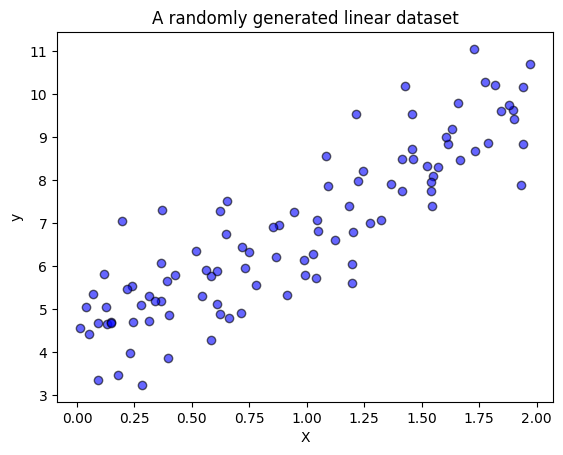

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="blue", alpha=0.6, edgecolors="k")
plt.xlabel("X")
plt.ylabel("y")
plt.title("A randomly generated linear dataset")
plt.show()

In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best

array([[3.86501051],
       [3.13916179]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

In [12]:
y_predict = X_new_b @ theta_best

In [13]:
y_predict

array([[ 3.86501051],
       [10.14333409]])

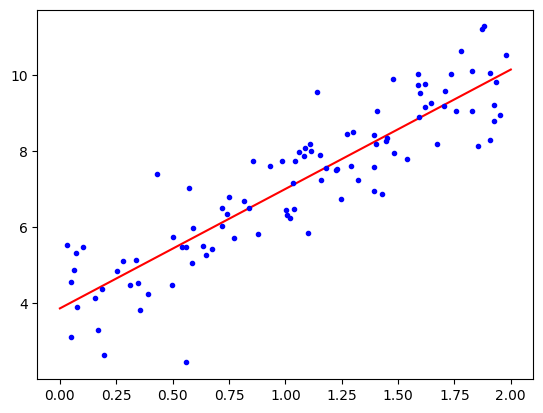

In [14]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [17]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals

(array([[3.86501051],
        [3.13916179]]),
 array([79.48178989]))

In [19]:
np.linalg.pinv(X_b) @ y

array([[3.86501051],
       [3.13916179]])

In [20]:
# SVD is more efficient than normal equation, and can solve the system
# even if X.T @ X is not invertible = i.e. no. features > no. samples or some features are redundant

In [21]:
"""
Hint: SVD and Normal EQ are:
- Linear to the number of samples (good thing, as long as they fit in memory)
- Square (SVD) or Quadratic or subquadratic in Normal EQ in no. features (Bad Thing)

Prediction speed:
- Linear in number of samples and features
"""

'\nHint: SVD and Normal EQ are:\n- Linear to the number of samples (good thing, as long as they fit in memory)\n- Square (SVD) or Quadratic or subquadratic in Normal EQ in no. features (Bad Thing)\n\nPrediction speed:\n- Linear in number of samples and features\n'

### Gradient Descent (GD) (النزول التدريجي)

In [22]:
"""
 General Idea: tweak parameters gradually -> minimize a cost function
 How? Move in the direction of the steepest slope till the direction of
 the steepest slope (i.e. the gradient) is zero => REACHED A MINMIMUM!
"""

'\n General Idea: tweak parameters gradually -> minimize a cost function\n How? Move in the direction of the steepest slope till the direction of\n the steepest slope (i.e. the gradient) is zero => REACHED A MINMIMUM!\n'

In [23]:
"""
MSE cost fun of Linear regression is convex.. One global minimum
"""

'\nMSE cost fun of Linear regression is convex.. One global minimum\n'

In [24]:
# When using gradient descent = ensure that all features have same scale => could use standard scaler ==> or it will take much longer time to converge

In [25]:
# Full (Batch) Gradient Descent scales well with no. features, but badly with number of samples as it iterates over all of them

In [26]:
# ∂/∂θj MSE(θ) = 2/m * i=1∑m ( (x(i))⊤ * θ − y(i) ) * xj(i)
# ∇θMSE(θ)= 2/m * X⊤(Xθ−y)
# θ(next) = θ − η*∇θMSE(θ)

In [27]:
eta = 0.1
m = len(X_b)
n_epochs = 1000

np.random.seed(42)
theta = np.random.randn(2, 1)

In [28]:
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - gradients * eta

In [29]:
theta

array([[3.86501051],
       [3.13916179]])

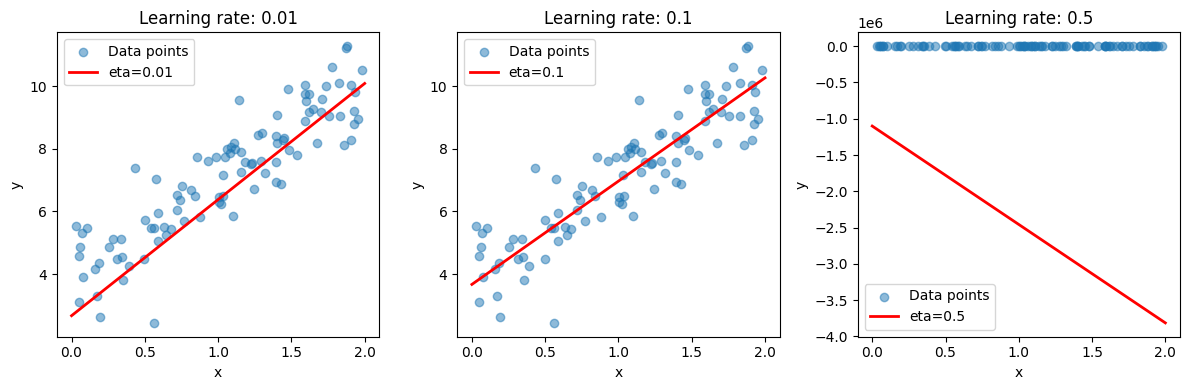

In [30]:
etas = [0.01, 0.1, 0.5]  # try different learning rates
n_epochs = 50

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

plt.figure(figsize=(12, 4))

for idx, eta in enumerate(etas, 1):
    theta = np.random.randn(2, 1)  # random init

    for epoch in range(n_epochs):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients

    # Predict line
    y_predict = X_new_b @ theta

    # Plot
    plt.subplot(1, 3, idx)
    plt.scatter(X, y, alpha=0.5, label="Data points")
    plt.plot(X_new, y_predict, "r-", linewidth=2, label=f"eta={eta}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Learning rate: {eta}")
    plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Stochastic GD النزول التدريجي العشوائي

In [32]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedula(t):
    return t0 / (t + t1)

In [33]:
np.random.seed(42)
theta = np.random.randn(2, 1)

In [34]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx: random_idx + 1]
        yi = y[random_idx: random_idx + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # Don't divide by 2 in stch
        eta = learning_schedula(epoch * m + iteration)
        theta = theta - eta * gradients

In [35]:
theta

array([[3.90521218],
       [3.15642095]])

In [36]:
# Answers what comes in your head: do I need to pass over all the instances, i.e. to force the algorithm to do so?
# Actually no: "However, this approach is more complex, and it generally does not improve the result."

In [37]:
"""
Warning
When using stochastic gradient descent, the training instances must be
independent and identically distributed (IID) to ensure that the
parameters get pulled toward the global optimum, on average. A simple
way to ensure this is to shuffle the instances during training (e.g., pick
each instance randomly, or shuffle the training set at the beginning of
each epoch). If you do not shuffle the instances—for example, if the
instances are sorted by label—then SGD will start by optimizing for one
label, then the next, and so on, and it will not settle close to the global
minimum.
"""

'\nWarning\nWhen using stochastic gradient descent, the training instances must be\nindependent and identically distributed (IID) to ensure that the\nparameters get pulled toward the global optimum, on average. A simple\nway to ensure this is to shuffle the instances during training (e.g., pick\neach instance randomly, or shuffle the training set at the beginning of\neach epoch). If you do not shuffle the instances—for example, if the\ninstances are sorted by label—then SGD will start by optimizing for one\nlabel, then the next, and so on, and it will not settle close to the global\nminimum.\n'

In [41]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, n_iter_no_change=100,
                       eta0=0.01, random_state=42, penalty=None)
sgd_reg.fit(X, y.ravel()) # because fit expects 1d targets not matrices

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [42]:
type(y), type(y.ravel())

(numpy.ndarray, numpy.ndarray)

In [43]:
y, y.ravel()

(array([[10.03577897],
        [ 6.30815309],
        [ 7.90524274],
        [ 7.72974022],
        [ 4.24452746],
        [ 8.27518734],
        [ 2.44336683],
        [ 3.12150816],
        [ 7.62026562],
        [ 3.81488089],
        [11.27516281],
        [ 8.29343008],
        [ 9.04914185],
        [ 6.35169278],
        [ 5.53401299],
        [ 8.13404922],
        [ 7.73226864],
        [ 9.81016198],
        [ 8.80021121],
        [ 9.58016021],
        [ 5.96575305],
        [ 5.71036949],
        [ 9.17662211],
        [ 5.51621843],
        [ 5.13047383],
        [ 8.00293825],
        [11.20294546],
        [ 6.93836328],
        [ 9.5534004 ],
        [ 2.63097116],
        [ 7.53825827],
        [10.52864031],
        [ 5.12149596],
        [ 6.48727839],
        [ 9.05611618],
        [ 7.95161077],
        [ 7.59272969],
        [ 9.0645066 ],
        [ 6.51396239],
        [ 5.06864147],
        [ 9.75576681],
        [ 9.16797989],
        [10.01529603],
        [10

In [44]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86131949]), array([3.14205529]))

### Polynomial Regression

In [5]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

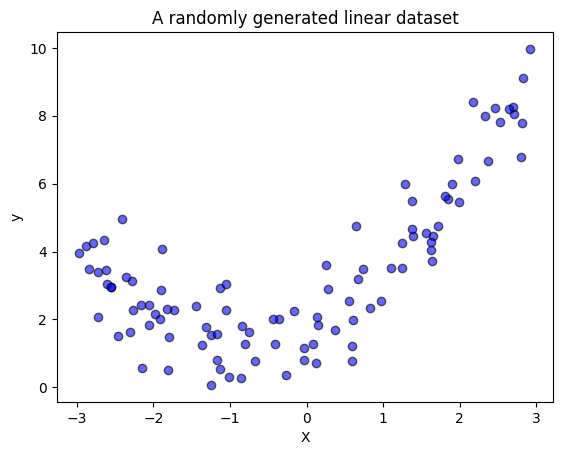

In [46]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="blue", alpha=0.6, edgecolors="k")
plt.xlabel("X")
plt.ylabel("y")
plt.title("A randomly generated linear dataset")
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]
# X poly now contain X and X^2

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# y = 0.5 * X ** 2 + X + 2 + random
# y_pred = .56 * X ** 2 + .93 X + 1.78

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [49]:
y_pred = lin_reg.predict(X_poly)

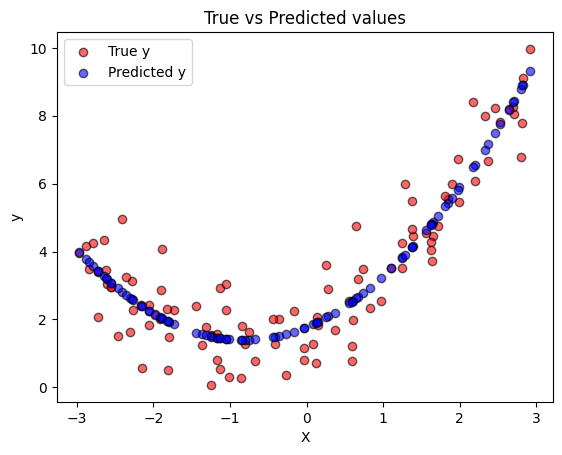

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="red", alpha=0.6, edgecolors="k", label="True y")

plt.scatter(X, y_pred, color="blue", alpha=0.6, edgecolors="k", label="Predicted y")

plt.xlabel("X")
plt.ylabel("y")
plt.title("True vs Predicted values")
plt.legend()
plt.show()


### Learning Curves

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

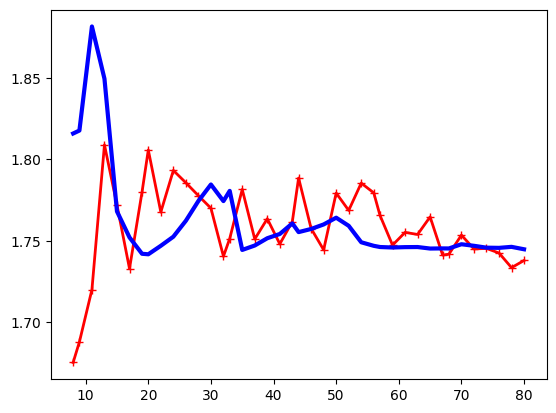

In [10]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(.1, 1.0, 40),
    cv=5, scoring="neg_root_mean_squared_error"
)
plt.plot(train_sizes, -train_scores.mean(axis=1), "r-+", linewidth=2, label="Training score")
plt.plot(train_sizes, -valid_scores.mean(axis=1), "b-", linewidth=3, label="Validation score")
plt.show()

In [12]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(.1, 1.0, 40))

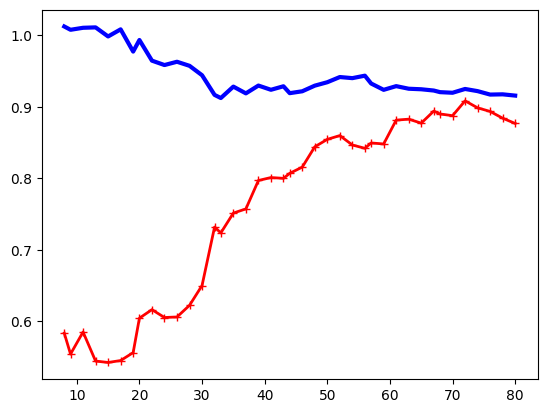

In [13]:
plt.plot(train_sizes, -train_scores.mean(axis=1), "r-+", linewidth=2, label="Training score")
plt.plot(train_sizes, -valid_scores.mean(axis=1), "b-", linewidth=3, label="Validation score")
"""There is a gap between the curves. This means that the model performs
significantly better on the training data than on the validation data, which
is the hallmark of an overfitting model. If you used a much larger training
set, however, the two curves would continue to get closer."""

### Regularized Linear Models

#### Ridge Regression
J(θ) = MSE(θ) + α * (j=1∑n \[ (θj)2 \])
Now the learning algorithm is forced not to make the theta's not too big

In [14]:
# J(θ) = MSE(θ) + α * (j=1∑n [ (θj)2 ])
# increase α? θ's go down
# decrease α? θ's go down (α = 0? normal linear regression)
# θ0 not regularized, why?

In [ ]:
# Gradient of normal loss function in batch GD:
# ∇wMSE= (2/m) * X.T * (X * w + b − y)
# In ridge cost function, the derivative is:
# ∇wJ(w) = ∇wMSE + 2*α/m * w
# w consists of θ1 to θn
# m is the number of samples

In [ ]:
# Solving ridge regression derivative equation for θ
# θ^ = (X⊤*X+ α*A)^−1 * X⊤ * y
# A: usually an 𝑛×𝑛 identity matrix (with a 0 in the top-left if we want to exclude the bias term)

In [15]:
# Closed form solution of ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [18]:
# Gradient descent solution of ridge regression (Stochastic)
# penalty = "l2" === Ridge Regression
# alpha = Regularization strength
# no toleranc for stopping criteria, only the number of iterations
# max_iter is number of epochs
# eta0 is learning rate
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

### Lasso Regression

In [ ]:
# Automatically does feature selection = sets some weights to zeros

In [5]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.2105793])

In [6]:
# Ridge is a good default, but if you suspect that only a few features are useful, you should prefer lasso or elastic net because they tend to reduce the useless features’ weights down to zero, as discussed earlier.  In general, elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [7]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.10683147])

### Early Stopping

In [29]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_val_prep = preprocessing.transform(X_val)

In [31]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

In [33]:
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_val_prep)
    val_error = mean_squared_error(y_val, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
# why deep copy? a sit copies model's hyperparameters and the learned parameters, in contrast to sklearn.base.clone() as it clones the hyperparameter only

### Logistic Regression

In [ ]:
# p ^ = h θ ( x ) = σ ( θ ⊺ x )
# σ ( t ) = 1 / (1+exp(-t))
# y ^ = 0 if p ^ < 0.5 1 if p ^ ≥ 0.5
# t is called the logit, logit function is inverse of logistic function
# logit(p) = log(p / (1 – p)), logit = log-odds, ratio between the
# estimated probability for positive / negative classes

In [14]:
import math

#Cost function of a single training instance
# c(θ)=-log(p^)if y=1
- math.log(.999999999) / math.log(2), - math.log(.0000000000005) / math.log(2)
# The closer to 1 (correct class) => the less the cost, the closer to 0 (the wrong class) => the higher the cost

(1.4426950008081088e-09, 40.86313713864835)

In [18]:
# c(θ)=-log(1-p^)if y=0
- math.log(1 - 0.000000000001) / math.log(2), - math.log(1 - .999999999999999) / math.log(2)
# The same

(1.4426631259937697e-12, 49.830074998557684)

In [ ]:
# Log Loss
# J(θ) = −(1/m){i=1∑m}[y(i)log(p^(i)) + (1−y(i))log(1−p^(i))]

In [1]:
# Log loss has an implicit assumption which is that the instances follow a Gaussian distribution around the mean of their class
# Linear regression has also an implicit assumption which is that the points are linear plus Gaussian noise.

In [2]:
# So if the data is not linear (Quadratic for ex) or if the noise is not Gaussian (Outliers are not exponentially rare).

In [ ]:
# ∂/∂θj J(θ) = 1/m * i=1∑m (σ(θ⊤x(i))−y(i))xj(i)
# Similar to the derivative of linear regression loss function
# Difference is in σ(θ⊤x(i)), the hypothesis

#### Decision Boundaries (Applying with Iris Dataset)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
type(iris)

sklearn.utils._bunch.Bunch

In [6]:
iris['data'].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
iris['target'].head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris["target_names"][iris["target"]] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
len(X_train), len(X_test)

(112, 38)

In [17]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
import numpy as np

In [21]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [22]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]


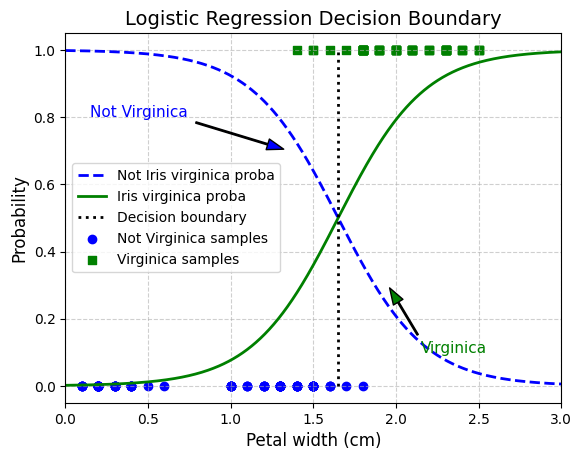

In [27]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:",
linewidth=2, label="Decision boundary")
plt.scatter(X[y==0], np.zeros_like(X[y==0]), marker="o", color="blue", label="Not Virginica samples")
plt.scatter(X[y==1], np.ones_like(X[y==1]), marker="s", color="green", label="Virginica samples")

# تزيين
plt.xlabel("Petal width (cm)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Logistic Regression Decision Boundary", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# أسهم توضح الجهتين
plt.annotate("Not Virginica", xy=(decision_boundary-0.3, 0.7), xytext=(decision_boundary-1.5, 0.8),
             arrowprops=dict(facecolor="blue", shrink=0.05, width=1, headwidth=8), fontsize=11, color="blue")

plt.annotate("Virginica", xy=(decision_boundary+0.3, 0.3), xytext=(decision_boundary+0.5, 0.1),
             arrowprops=dict(facecolor="green", shrink=0.05, width=1, headwidth=8), fontsize=11, color="green")

plt.axis([X_new.min(), X_new.max(), -0.05, 1.05])  # حدود الرسم
plt.legend(loc="best")
plt.show()


In [28]:
decision_boundary

1.6516516516516517

In [29]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [30]:
# Controlling regularization in logistic regression is done by the invers of a => C, the bigger the C => the less regularization
# Scikit-Learn uses with logistic regression l2 penalty by default

### Softmax Regression (Generalization of Logistic Regression for Multiclass)

In [4]:
"""
Softmax score for class k (s[k]) = θ[k].T * x
important note here: each class has its own dedicated parameters vector θ(k)
We store θ(k)'s in a matrix Θ capital
p^[k] = σ(s(x))[k] = exp(s[k](x)) / ∑ {j=1 to K} exp(s[j](x))
We use argmax on p's to get the predicted class
"""

"\nSoftmax score for class k (s[k]) = θ[k].T * x\nimportant note here: each class has its own dedicated parameters vector θ(k)\nWe store θ(k)'s in a matrix Θ capital\np^[k] = σ(s(x))[k] = exp(s[k](x)) / ∑ {j=1 to K} exp(s[j](x))\nWe use argmax on p's to get the predicted class\n"

In [3]:
"""
The softmax regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different species of plants. You cannot use it to recognize multiple people in one picture.
"""

'\nThe softmax regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different species of plants. You cannot use it to recognize multiple people in one picture.\n'

In [5]:
"""
Cross Entropy Function (log loss):
* used for classification problems, particularly when the model outputs class probabilities (like in Softmax Regression or Neural Networks)
* J(Θ)= −1 / m * {i=1∑m}{k=1∑K}( y[k](i) * log(p^[k](i)))
Notes: p^[k](i) will never be 0 since it's e power something => log will not be -infinity
"""

"\nCross Entropy Function (log loss):\n* used for classification problems, particularly when the model outputs class probabilities (like in Softmax Regression or Neural Networks)\n* J(Θ)= −1 / m * {i=1∑m}{k=1∑K}( y[k](i) * log(p^[k](i)))\nNotes: p^[k](i) will never be 0 since it's e power something => log will not be -infinity\n"

In [1]:
"""
Cross Entropy gradient vector for class k:
∇θ[k]J(Θ) = 1/m * {i=1∑m}(p^[k](i) - y[k](i))*x(i)
"""

'\nCross Entropy gradient vector for class k:\n∇θ[k]J(Θ) = 1/m * {i=1∑m}(p^[k](i) - y[k](i))*x(i)\n'

In [ ]:
# LogisticRegression class uses softmax regression automatically when the number of classes is more than 2 classes
# It also applies l2 regularization by default controlled by C (inverse of a), and the solver is lbfgs

In [4]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [6]:
softmax_reg.predict([[5, 2]])

C:\Users\20106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [7]:
softmax_reg.predict_proba([[5, 2]]).round(2)

C:\Users\20106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.  , 0.04, 0.96]])

C:\Users\20106\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


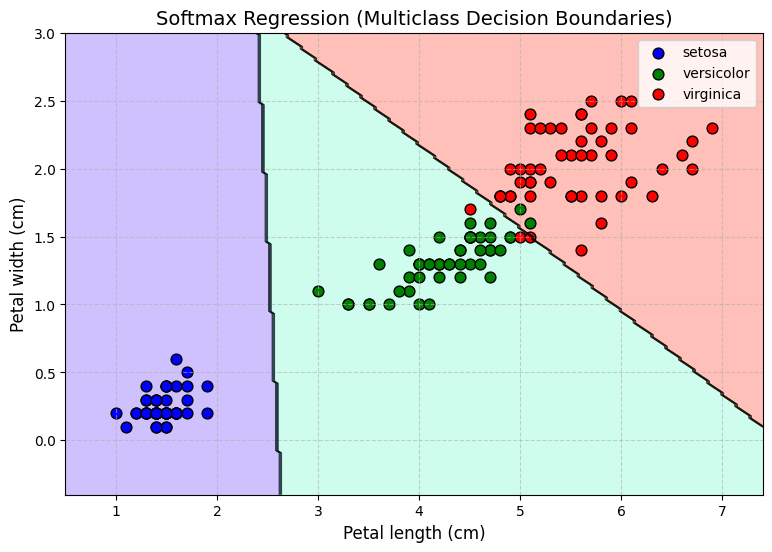

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# تحميل بيانات Iris
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# تدريب Softmax Regression (multiclass)
softmax_reg = LogisticRegression(C=30, random_state=42, multi_class="multinomial")
softmax_reg.fit(X_train, y_train)

# إنشاء شبكة من النقاط لتصور الحدود
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200)
)
X_new = np.c_[x0.ravel(), x1.ravel()]

# التنبؤات
y_proba = softmax_reg.predict_proba(X_new)
y_pred = softmax_reg.predict(X_new)
y_pred = y_pred.reshape(x0.shape)

# رسم الحدود
plt.figure(figsize=(9, 6))
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.rainbow)
plt.contour(x0, x1, y_pred, colors="k", linewidths=0.5)

# رسم نقاط التدريب
for i, color, label in zip(range(3), ["blue", "green", "red"], iris.target_names):
    plt.scatter(
        X[y == i, 0],
        X[y == i, 1],
        color=color,
        label=label,
        edgecolor="k",
        s=60
    )

# تزيين الشكل
plt.xlabel("Petal length (cm)", fontsize=12)
plt.ylabel("Petal width (cm)", fontsize=12)
plt.title("Softmax Regression (Multiclass Decision Boundaries)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Exercises

In [9]:
"""Which linear regression training algo can you use if you have a training set with millions of features?

Gradient descent (linear in number of features) => Not normal eq or SVD

Batch or stochastic or mini?
Stochastic or mini => to make the data fit in memory and make calculations a bit faster
"""

'Which linear regression training algo can you use if you have a training set with millions of features?\n\nGradient descent (linear in number of features) => Not normal eq or SVD\n\nBatch or stochastic or mini?\nStochastic or mini => to make the data fit in memory and make calculations a bit faster\n'

In [ ]:
"""Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

Gradient descent. It may move slowly in some direction and very slow in another => twisted route. Use standard scaling or 0-1 scaling"""

In [ ]:
"""
Can gradient descent get stuck in a local minimum when training a logistic
regression model?

No => Convex => Global minimum
"""

In [ ]:
"""
Do all gradient descent algorithms lead to the same model, provided you
let them run long enough?

No => stochastic and mini GD keep oscillating around the optimal point
"""

In [ ]:
"""
Which gradient descent algorithm (among those we discussed) will reach
the vicinity of the optimal solution the fastest? Which will actually
converge? How can you make the others converge as well?

* Stochastic or mini
* Full
* By using a small learning rate and waiting for enough time
"""

In [ ]:
"""
Suppose you are using polynomial regression. You plot the learning curves
and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Overfitting
* Using regularization => ridge (l2), lasso (l1) or elastic net (mixture of l1 and l2)
* Early stopping
* Reduce model complexity
"""

In [ ]:
"""
Suppose you are using ridge regression and you notice that the training
error and the validation error are almost equal and fairly high. Would you
say that the model suffers from high bias or high variance? Should you
increase the regularization hyperparameter α or reduce it?

High bias.
Decrease.
"""

In [ ]:
"""
 Why would you want to use:
a. Ridge regression instead of plain linear regression (i.e., without any
regularization)?
b. Lasso instead of ridge regression?
c. Elastic net instead of lasso regression?

a. To help the model avoid overfitting => not giving high weights to parameters

b. When only few features are important => automatic feature selection => sets weights to zero

c. Lasso behaves unstably when the number of features is greater than the number of features and when several features are strongly correlated.
"""

In [ ]:
"""
Suppose you want to classify pictures as outdoor/indoor and daytime/
nighttime. Should you implement two logistic regression classifiers or one
softmax regression classifier?

I won't be able to use one softmax regression classifier => softmax is multiclass not multioutput
"""

In [1]:
from sklearn.preprocessing import add_dummy_feature
import numpy as np
from sklearn.preprocessing import StandardScaler

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

def train(X, y, eta=0.01, n_epochs=1000):
    """
    p^[k] = σ(s(x))[k] = exp(s[k](x)) / ∑ {j=1 to K} exp(s[j](x))

    Cross Entropy gradient vector for class k:
    ∇θ[k]J(Θ) = 1/m * {i=1∑m}(p^[k](i) - y[k](i))*x(i)

    Dimensions:
    X.dim = m * n
    y.dim = m * 1
    X_b.dim = m * (n + 1)
    y_onehot.dim = m * k (0-1)
    theta.dim = (n + 1) * k (parameters matrix)
    logits.dim = m * (n + 1) @ (n + 1) * k = m * k (k numbers for m samples)
    probs.dim = m * k
    """


    np.random.seed(42)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_b = add_dummy_feature(X_scaled)
    m = len(X)
    input_features = len(X_b[0])
    # OR: m, n = X_b.shape
    k = len(np.unique(y))
    y_onehot = np.eye(k)[y]

    theta = np.random.randn(input_features, k)

    for epoch in range(n_epochs):
        logits = X_b @ theta
        probs = softmax(logits)
        gradients = 1/m * X_b.T @ (probs - y_onehot)
        theta = theta - gradients * eta


    return theta, scaler

def predict(X_test, theta, scaler):
    X_test_scaled = scaler.fit_transform(X_test)
    X_test_b = add_dummy_feature(X_test_scaled)
    logits = X_test_b @ theta
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)

X = iris.data
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
theta, scaler = train(X_train, y_train)

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predict(X_test, theta, scaler))

0.8947368421052632

## Chapter V: Support Vector Machines (SVMs)

In [ ]:
# Shine with small - medium (hundreds to thousands) of instances of nonlinear data
# But don't perfrom well when the data is too big

In [1]:
# Keywords: large margin classification => stay away from the training instances of each class

In [ ]:
# Support vectors are the training instances closest to the classifier

In [ ]:
# Warning: SVMs are sensitive to feature scaling

### Soft Margin Classification

In [1]:
# Idea: الموازنة بين أن يكون الطريق واسعا جدا؛ وأن نقلل جدا النقاط التي تكسر الكلاسيفير من أوتلايرز

In [4]:
# كلما قللنا ال C (زودنا الألفا زودنا الريجولايزيشن) كلما زاد ال underfitting أي أن النموذج يخطئ كثيرا => أي أن الشارع واسع
# والعكس

In [5]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [12]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [13]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))

In [14]:
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [15]:
X_new = [[5.5, 1.7], [5, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [16]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

### Nonlinear SVM Classification

In [17]:
# البيانات التي لا يمكن فصلها عن بعض البعض بشكل خطي يمكن حل اشكاليتها باضافة خصائص polynomial انظر الرسمة figure 5-5

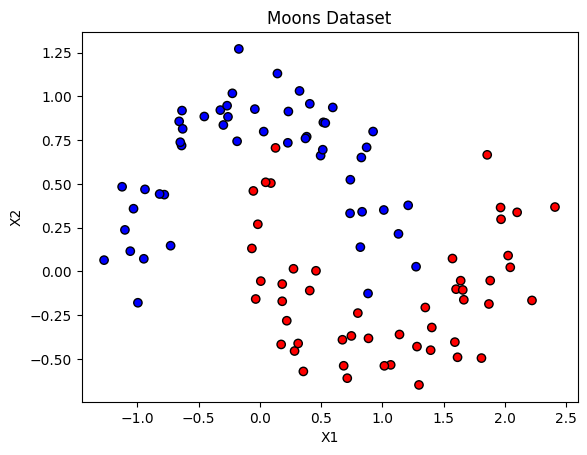

In [18]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Moons Dataset")
plt.show()

In [19]:
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearSVC(C=10, max_iter=10000,
                                             random_state=42))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(polynomial_svm_clf, X, y, cv=5)
scores

array([0.9, 1. , 0.9, 1. , 1. ])

In [21]:
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=13),
                                   StandardScaler(),
                                   LinearSVC(C=10, max_iter=10000,
                                             random_state=42))
polynomial_svm_clf.fit(X, y)
scores = cross_val_score(polynomial_svm_clf, X, y, cv=5)
scores

array([0.85, 1.  , 0.85, 1.  , 0.9 ])

In [22]:
svm_clf.fit(X, y)
scores = cross_val_score(svm_clf, X, y, cv=5)
scores

array([0.8, 1. , 0.8, 0.9, 0.8])

### Polynomial Kernel

In [23]:
"""
Polynomial features :
few => low ability to handle big datasets
many => high cost

Solution??
Kernel features => The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with a very high degree, without actually having to add them. This means there’s no combinatorial explosion of the number of features.
"""

'\nPolynomial features :\nfew => low ability to handle big datasets\nmany => high cost\n\nSolution??\nKernel features => The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with a very high degree, without actually having to add them. This means there’s no combinatorial explosion of the number of features.\n'

In [24]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))

# The higher the degree => the more overfitting
# The higher the C => the lower the alpha => the less regu. => the more overfitting
# coef0 => high degree terms effect / low degree terms effect
"""
Tip: كده كده في الاخر هنستخدم راندوم أو جريد سيرش في البحث عن أحسن هايبر بارامترز => بس محتاج برده تفهم معنى كل واحد هذا الفهم قد يقلل مساحة البحث كثيرا
"""

'\nTip: كده كده في الاخر هنستخدم راندوم أو جريد سيرش في البحث عن أحسن هايبر بارامترز => بس محتاج برده تفهم معنى كل واحد هذا الفهم قد يقلل مساحة البحث كثيرا\n'

In [25]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(poly_kernel_svm_clf, X, y, cv=5)
scores

array([0.9, 1. , 0.9, 1. , 1. ])

In [27]:
print(cross_val_score(svm_clf, X, y, cv=5),
cross_val_score(polynomial_svm_clf, X, y, cv=5),
cross_val_score(poly_kernel_svm_clf, X, y, cv=5))

[0.8 1.  0.8 0.9 0.8] [0.85 1.   0.85 1.   0.9 ] [0.9 1.  0.9 1.  1. ]


In [28]:
import math

In [29]:
print(math.fsum(cross_val_score(svm_clf, X, y, cv=5))/5,
math.fsum(cross_val_score(polynomial_svm_clf, X, y, cv=5))/5,
math.fsum(cross_val_score(poly_kernel_svm_clf, X, y, cv=5)/5))

0.86 0.9199999999999999 0.96


### Similarity Features

In [30]:
# ما افهمه انك تنشئ لاند مارك عند كل النقاط ثم تحسب ال RBF عشان تشوف مدى تقارب النقاط من كل land mark

In [31]:
# الاشكال؟ عدد خصائص كبير جدا | الحل؟ Kernel trick

In [32]:
"""
Just like the polynomial features method, the similarity features method can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features (especially on large training sets). Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features, but without actually doing so
"""

'\nJust like the polynomial features method, the similarity features method can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features (especially on large training sets). Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features, but without actually doing so\n'

In [33]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [34]:
print(cross_val_score(svm_clf, X, y, cv=5),
cross_val_score(polynomial_svm_clf, X, y, cv=5),
cross_val_score(poly_kernel_svm_clf, X, y, cv=5),
cross_val_score(rbf_kernel_svm_clf, X, y, cv=5))

[0.8 1.  0.8 0.9 0.8] [0.85 1.   0.85 1.   0.9 ] [0.9 1.  0.9 1.  1. ] [0.95 1.   0.95 1.   0.95]


In [35]:
print(math.fsum(cross_val_score(svm_clf, X, y, cv=5))/5,
math.fsum(cross_val_score(polynomial_svm_clf, X, y, cv=5))/5,
math.fsum(cross_val_score(poly_kernel_svm_clf, X, y, cv=5)/5),
math.fsum(cross_val_score(rbf_kernel_svm_clf, X, y, cv=5)/5),
)

0.86 0.9199999999999999 0.96 0.97


In [36]:
# Gamma acts like a regularization hyperparameter: increase it => more overfitting, decrease it => underfitting (like C)

In [37]:
"""Other kernels exist but are used much more rarely. Some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance)."""

'Other kernels exist but are used much more rarely. Some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).'

In [38]:
"""
تستخدم انه كيرنيل؟ ابدأ بال linear وينصحك بفصل LinearSVC لا SVC(kernel=linear) لأنها اسرع بكثير لا سيما لو البيانات كثيرة
وان تجرب بعد ذلك ال RBF لأنها تعمل جيدا غالبا؛ ثم جرب على حسب وقتك لغيره
"""

'\nتستخدم انه كيرنيل؟ ابدأ بال linear وينصحك بفصل LinearSVC لا SVC(kernel=linear) لأنها اسرع بكثير لا سيما لو البيانات كثيرة\nوان تجرب بعد ذلك ال RBF لأنها تعمل جيدا غالبا؛ ثم جرب على حسب وقتك لغيره\n'

In [43]:
# LinearSVC: scales almost linearly with the no. features | instances (Doesn't support tkernel trick)
# SVC class doesn't scale well with no.instances (Support kernel trick)
"""
|   Class   |Time Compl.|  Scaling  |KernelTrick|
| LinearSVC |    mxn    |    Yes    |     No    |
|SGDClassif.|    mxn    |    Yes    |     No    |
|    SVC    |m^(2||3)xn |    Yes    |     Yes   |
"""


'\n|   Class   |Time Compl.|  Scaling  |KernelTrick|\n| LinearSVC |    mxn    |    Yes    |    No    |\n|SGDClassif.|    mxn    |    Yes    |    No    |\n|    SVC    |m^(2||3)xn |    Yes    |    Yes   |\n'

### Support vector regression (SVR)

In [44]:
"""بدل ما نحاول نمر بالنقاط، نحاول نرسم خط مستقيم يكون كل النقاط قريبة منه ضمن حدود معينة من الخطأ اسمها ϵ (إبسيلون)."""

'بدل ما نحاول نمر بالنقاط، نحاول نرسم خط مستقيم يكون كل النقاط قريبة منه ضمن حدود معينة من الخطأ اسمها ϵ (إبسيلون).'

In [45]:
"""SVM Regression مش بتحاول تمر بكل النقاط،
لكن بتحاول تمر “قريب منها” في حدود خطأ صغير مسموح به (ϵ).
وكل نقطة خارج الحدود دي هي اللي فعلاً بتأثر على شكل النموذج (ودي اسمها support vectors)."""

'SVM Regression مش بتحاول تمر بكل النقاط،\nلكن بتحاول تمر “قريب منها” في حدود خطأ صغير مسموح به (ϵ).\nوكل نقطة خارج الحدود دي هي اللي فعلاً بتأثر على شكل النموذج (ودي اسمها support vectors).'

In [46]:
"""
افترض إنك بتتنبأ بسعر بيت من مساحته.
لو قلت للموديل "مش مشكلة لو السعر اللي تتنبأ بيه يختلف ±10,000 جنيه" (ده هو ϵ)،
فهو هيحاول يرسم خط بحيث معظم الأسعار الفعلية تقع جوه المدى ده.
أما البيوت اللي سعرها الفعلي بعيد أكتر من كده — فهي اللي هتأثر فعلاً على الموديل."""

'\nافترض إنك بتتنبأ بسعر بيت من مساحته.\nلو قلت للموديل "مش مشكلة لو السعر اللي تتنبأ بيه يختلف ±10,000 جنيه" (ده هو ϵ)،\nفهو هيحاول يرسم خط بحيث معظم الأسعار الفعلية تقع جوه المدى ده.\nأما البيوت اللي سعرها الفعلي بعيد أكتر من كده — فهي اللي هتأثر فعلاً على الموديل.'

In [47]:
"""
الفرق بين ال SVR وال linear regression:
* أخينا القديم يحسب الخطأ لكل نقطة؛ أما الثاني فيحسب لل support vectors فقط
"""

'\nالفرق بين ال SVR وال linear regression:\n* أخينا القديم يحسب الخطأ لكل نقطة؛ أما الثاني فيحسب لل support vectors فقط\n'

In [50]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.linspace(-3, 3, 50).reshape(-1, 1)
y =  2 * X[:, 0] + 1 + np.random.randn(50) * 0.5

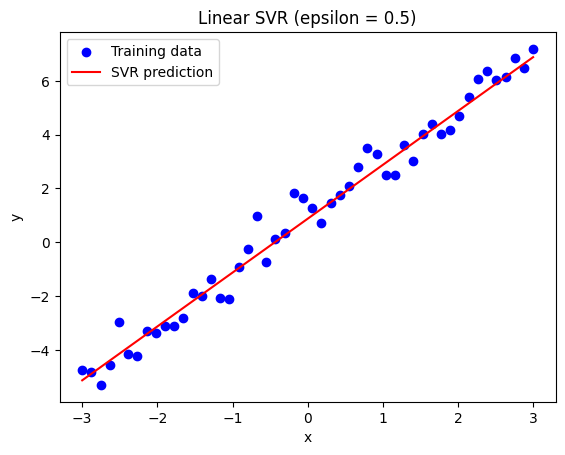

In [53]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X, y)
y_pred = svm_reg.predict(X)
plt.scatter(X, y, color="blue", label="Training data")
plt.plot(X, y_pred, color="red", label="SVR prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear SVR (epsilon = 0.5)")
plt.show()

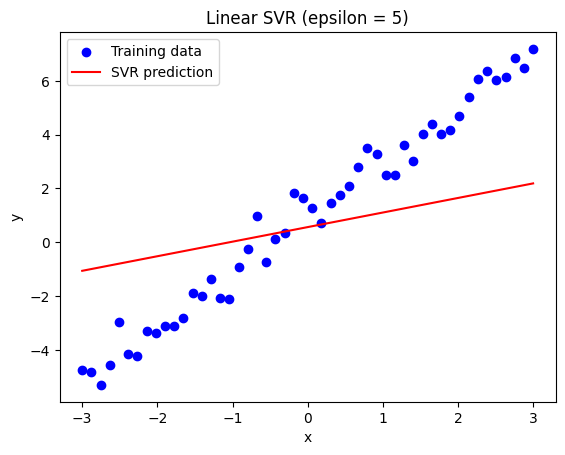

In [54]:
svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=5, random_state=42))
svm_reg.fit(X, y)
y_pred = svm_reg.predict(X)
plt.scatter(X, y, color="blue", label="Training data")
plt.plot(X, y_pred, color="red", label="SVR prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear SVR (epsilon = 5)")
plt.show()

In [40]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

X= np.linspace(-3, 3, 50).reshape(-1, 1)
y =  2 * X[:, 0]*X[:, 0] + 1 + np.random.randn(50) * 0.5

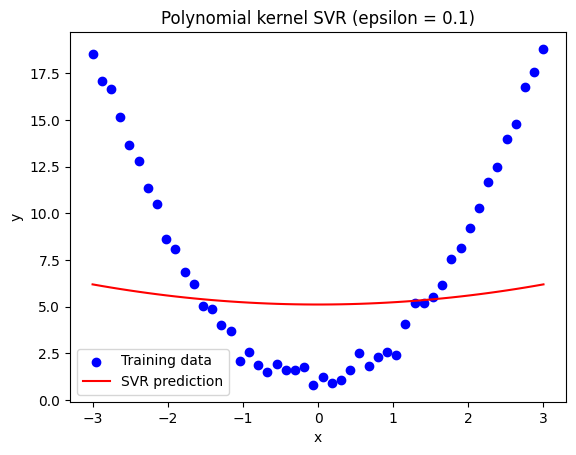

In [41]:
svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)
y_pred = svm_poly_reg.predict(X)
plt.scatter(X, y, color="blue", label="Training data")
plt.plot(X, y_pred, color="red", label="SVR prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial kernel SVR (epsilon = 0.1)")
plt.show()

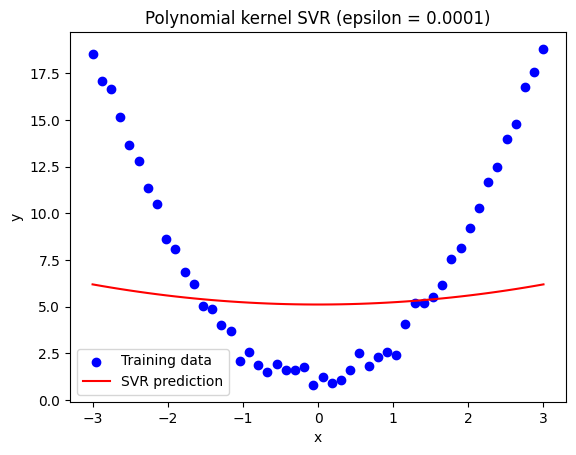

In [44]:
svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.0001))
svm_poly_reg.fit(X, y)
y_pred = svm_poly_reg.predict(X)
plt.scatter(X, y, color="blue", label="Training data")
plt.plot(X, y_pred, color="red", label="SVR prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial kernel SVR (epsilon = 0.0001)")
plt.show()

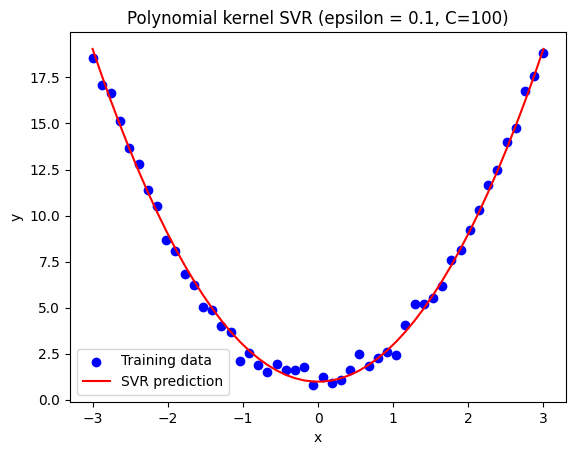

In [47]:
svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=100, epsilon=0.1))
svm_poly_reg.fit(X, y)
y_pred = svm_poly_reg.predict(X)
plt.scatter(X, y, color="blue", label="Training data")
plt.plot(X, y_pred, color="red", label="SVR prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial kernel SVR (epsilon = 0.1, C=100)")
plt.show()

### Explaination of SVM Loss and Optimization Goal

In [ ]:
# We want to: classify the points right + maximize the margin (Street) while minimizing the number of violations
# ازاي نضمن ان مفيش نقطة تخش في الشارع؟  ببساطة هتقول ان اي نقطة موجبة لازم تكون فوق ال HYPER Plane اي الخط الفاصل بمسافة 1 وكذا السالبة
# طيب اذن انا عايز اعمل حاجتين: اكبر المارجين (من الرسمة = اقلل الاوزان) بشرط ان ال support vectors تكون على الاقل على بعد 1 من الخطا الفاصل من فوق وتحت
# Minimize w = minimize w^2
"""
min(w,b)[0.5 * w.t @ x] subject to (w.T @ x + b) >= 1, i = 1 ... m
"""
# هذا يسمى بالهارد مارجين الذي لا يسمح باي تجاوز

In [ ]:
# Soft constraint
"""
t(i)(w⊤x(i)+b)≥1−ζ(i)
نريد ان نفعل الاتي => نقلل الأوزان وفي نفس الوقت نقلل ال ζ =>هدفين يتعارضون مع بعضهم البعض => تقليل ال ζ يعني تكبير طرفها => اي اننا نريد تكبير الطرف الاخر حتى يكون اكبر جدا من الايمن الذي زاد => لكننا اصلا منا نريد تقليل ال w
شرح اخر:
لو كبرت المارجن جدًا => هتسمح ببعض الأخطاء.
لو منعت الأخطاء تمامًا => المارجن هيصغر جدًا.
طيب نعمل ايه؟ الاتنين مش متوفقين مع بعض
هنا اظهر اهمية ال c
المعامل ده بيدد قد ايه النموذج متشدد او متسامح مع الاخطاء
بص وركز
min 1/2*w⊤*w + C∑ζ(i)
الجزء الاول بيوسع المارجين (قد تزداد الاخطاء) الجزء التاني بيحاول يقلل التسامح مع الاخطاء يظل الماسفة بين الساببورت فكتور والهايبربلان قريبة من 1)
ركز بقا مع الجزء التاني المعنى بمحاولة تقليل التجاوزات لأقصى درجة؛ لو كبرت ال c هيكون فيه عقوبة كبيرة جدا على الاخطاء => يقلل الخطا جدا => overfitting

"""

### The Dual Problem

In [ ]:
# فايدتها في حاجتين
# الاولى هي لما يكون عدد الخصائص اكبر من عدد العينات
# تعيننا ان نقوم بعمل الكرنيل تريك
# # min(1/2 * i,j∑αi*αj*ti*tj*xi⊤*xj − i∑αi)

### Kernelized SVMs

### Exercises

In [1]:
"""
1. What is the fundamental idea behind support vector machines?
Separating the two classes with a hyper plane, while keeping the area between the hyperplane and the support vectors as big as possible, and minimize the violations of the street
"""

'\n1. What is the fundamental idea behind support vector machines?\nSeparating the two classes with a hyper plane, while keeping the area between the hyperplane and the support vectors as big as possible, and minimize the violations of the street\n'

In [2]:
"""
2. What is a support vector?
The nearest points to the hyperplane, defining its position and orientation.
"""

'\n2. What is a support vector?\nThe nearest points to the hyperplane, defining its position and orientation.\n'

In [2]:
"""
3. Why is it important to scale the inputs when using SVMs?
Because not doing so, the model will prioritize separating features with larger numerical ranges, will make the street very narrow, not because the model is not well fitting, but because the scales are different
"""

'\n3. Why is it important to scale the inputs when using SVMs?\nBecause not doing so, the model will prioritize separating features with larger numerical ranges, will make the street very narrow, not because the model is not well fitting, but because the scales are different\n'

In [3]:
"""4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
I think the model function does this, the number it outputs presents the distance to the hyperplane. Not probability I think. But it can be added after additional calibration.
"""

'4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?\nI think the model function does this, the number it outputs presents the distance to the hyperplane. Not probability I think. But it can be added after additional calibration.\n'

In [4]:
"""
5. How can you choose between LinearSVC, SVC, and SGDClassifier?
SVC is preferred when data is nonlinear.
LinearSVC and SGD are faster, so thy might be used it data is big.
If kernel trick is needed (Non linear data) => SVC
Online learning | incremental => SGD
"""

'\n5. How can you choose between LinearSVC, SVC, and SGDClassifier?\nSVC is preferred when data is nonlinear.\nLinearSVC and SGD are faster, so thy might be used it data is big.\nIf kernel trick is needed (Non linear data) => SVC\nOnline learning | incremental => SGD\n'

In [5]:
"""
6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)?
What about C?
We should increase C => higher penality for violations => less violations => less errors
Gamma => increase also => to make the decision boundary more flexible
"""

'\n6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)?\nWhat about C?\nWe should increase C => higher penality for violations => less violations => less errors\nGamma => increase also => to make the decision boundary more flexible\n'

In [6]:
"""
7. What does it mean for a model to be ϵ-insensitive?
I'll explain by the SVM Regression: SVM tries to fit as many instances on the street while limiting the number of samples of the street.
The width of the street is controlled by ϵ => the higher the ϵ => the wider of the street => the less number of samples of the street => the less the number of support vectors => don't affect training => more general => more underfitting
The less the ϵ => the narrower the street => the more samples off the street => the more they contribute to the training => the more overfitting
"""

"\n7. What does it mean for a model to be ϵ-insensitive?\nI'll explain by the SVM Regression: SVM tries to fit as many instances on the street while limiting the number of samples of the street.\nThe width of the street is controlled by ϵ => the higher the ϵ => the wider of the street => the less number of samples of the street => the less the number of support vectors => don't affect training => more general => more underfitting\nThe less the ϵ => the narrower the street => the more samples off the street => the more they contribute to the training => the more overfitting\n"

In [ ]:
"""
8. What is the point of using the kernel trick?
Instead of adding x (x from 2 to inf) new features => we just calculate the kernel function between two samples which is eqv to calculating the dot product of these two points in the x-space => more non linear relationships appeal
"""

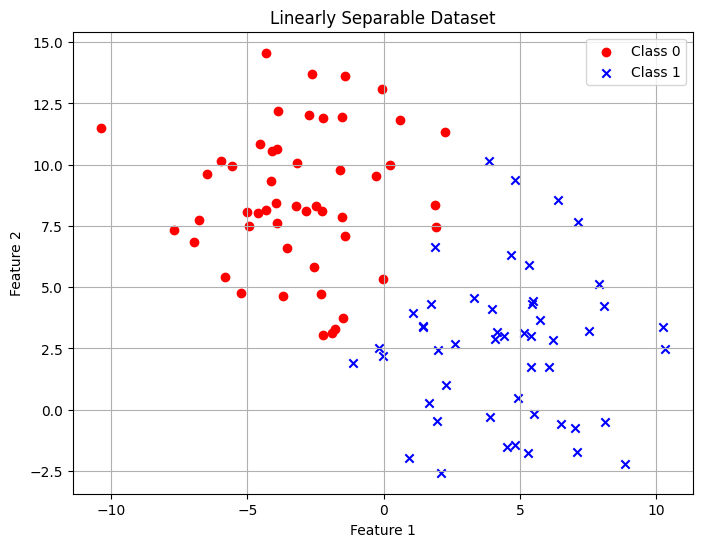

In [10]:
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from math import fsum
def question_10(m = 5):
    res = []
    for model in [LinearSVC(C=1, random_state=42), SVC(C=3.5, random_state=42), SGDClassifier(loss="hinge", alpha=.00001)]:
        pip = make_pipeline(StandardScaler(), model)
        res.append(fsum(cross_val_score(pip, X, y, cv=m))/m)

    return res

# Less regularized actually, all of this was done to cope with the best one which was the LinearSVC
question_10()

[0.9800000000000001, 0.9800000000000001, 0.9800000000000001]

In [1]:
"""
Q.10
"""

'\nQ.10\n'

In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rwzhang/seeds-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.63k/3.63k [00:00<00:00, 819kB/s]

Extracting files...
Path to dataset files: C:\Users\20106\.cache\kagglehub\datasets\rwzhang\seeds-dataset\versions\1


In [36]:
path

'C:\\Users\\20106\\.cache\\kagglehub\\datasets\\rwzhang\\seeds-dataset\\versions\\1'

In [2]:
path = 'C:\\Users\\20106\\.cache\\kagglehub\\datasets\\rwzhang\\seeds-dataset\\versions\\1'

In [8]:
import pandas as pd
import numpy as np

In [9]:
seed = pd.read_csv(path+"\seeds_dataset.txt", sep=r"\s+",
                 header=None,
                 engine="python")

In [10]:
len(seed)

210

In [19]:
seed

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [23]:
seed.iloc[np.random.randint(0, 210, 10)]

,0,1,2,3,4,5,6,7
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750,2
108,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
143,12.22,13.32,0.8652,5.224,2.967,5.469,5.221,3
168,11.35,13.12,0.8291,5.176,2.668,4.337,5.132,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
31,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,1
12,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,1
77,20.71,17.23,0.8763,6.579,3.814,4.451,6.451,2
93,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,3


In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from math import fsum
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

In [26]:
X = seed[np.arange(7)]
y = seed[7]
X.head(), y.head()

(       0      1       2      3      4      5      6
 0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
 1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
 2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
 3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805
 4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: 7, dtype: int64)

In [29]:
def try_all(models, c=5):
    res = []

    for model in models:
        pip = make_pipeline(StandardScaler(), model)
        res.append(fsum(cross_val_score(pip, X, y, cv=c))/c)

    return res

In [33]:
# Start linearly

models = [LinearSVC(C=1), SVC(C=1, kernel="linear"), SGDClassifier(loss="hinge")]
try_all(models)

[0.9523809523809523, 0.9142857142857143, 0.9333333333333332]

In [41]:
try_all([OneVsRestClassifier(SVC(C=1, kernel="linear"))])
## WOOOWOWOWOWOW!! SVC enhanced a lot when it uses one vs rest

[0.9523809523809523]

In [31]:
# Suspect class dominance
from sklearn.dummy import DummyClassifier
try_all([DummyClassifier()])

[0.3333333333333333]

In [45]:
# Trying to get higher results with the kernel trick
svcs = [SVC(C = 1, kernel = x) for x in ['poly', 'rbf', 'sigmoid']]
try_all(svcs)

[0.8523809523809524, 0.9142857142857143, 0.919047619047619]

In [44]:
# Trying to get higher results with the kernel trick & one vs all
svcs = [OneVsRestClassifier(SVC(C = 1, kernel = x)) for x in ['poly', 'rbf', 'sigmoid']]
try_all(svcs)

[0.9333333333333332, 0.9142857142857143, 0.8904761904761905]

In [ ]:
"""
Polynomial kernel enhanced, rbf is the same, sigmoid got worse when usd one vs rest classifier """

In [1]:
"""
Q.11
"""

'\nQ.11\n'

In [5]:
from sklearn import datasets

ds = datasets.fetch_california_housing()

In [3]:
ds

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
X, y = ds['data'], ds['target']

In [5]:
X, y

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [6]:
X[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [8]:
len(X)

20640

In [11]:
len(X[:2000, :])

2000

In [10]:
type(X)

numpy.ndarray

In [7]:
X, y = X[:2000, :], y[:2000]

In [8]:
len(X), len(y)

(2000, 2000)

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR, SVR
from math import fsum
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
SVR_res = []

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [0.01, 0.1, 1, 10, 100]:
        for epsilon in [0.01, 0.1, 1, 10, 100]:
            model = make_pipeline(StandardScaler(), SVR(kernel = kernel, C = C, epsilon = epsilon))
            SVR_res.append((kernel,
                        C, epsilon,
             -fsum(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))/5))


In [28]:
SVR_res

[('linear', 0.01, 0.01, 0.33176437031793127),
 ('linear', 0.01, 0.1, 0.3292359690400445),
 ('linear', 0.01, 1, 0.4209957968073489),
 ('linear', 0.01, 10, 1.4373589540799996),
 ('linear', 0.01, 100, 1.4373589540800003),
 ('linear', 0.1, 0.01, 0.33507824938750524),
 ('linear', 0.1, 0.1, 0.33487418461202306),
 ('linear', 0.1, 1, 0.43485705005846925),
 ('linear', 0.1, 10, 1.4373589540799996),
 ('linear', 0.1, 100, 1.4373589540800003),
 ('linear', 1, 0.01, 0.3380235707680114),
 ('linear', 1, 0.1, 0.3364512246021153),
 ('linear', 1, 1, 0.4313787918449338),
 ('linear', 1, 10, 1.4373589540799996),
 ('linear', 1, 100, 1.4373589540800003),
 ('linear', 10, 0.01, 0.3383632483276307),
 ('linear', 10, 0.1, 0.33652429978485),
 ('linear', 10, 1, 0.4320632534296721),
 ('linear', 10, 10, 1.4373589540799996),
 ('linear', 10, 100, 1.4373589540800003),
 ('linear', 100, 0.01, 0.33837832237326165),
 ('linear', 100, 0.1, 0.33670698848051334),
 ('linear', 100, 1, 0.43214735114379604),
 ('linear', 100, 10, 1.43

In [29]:
import pandas as pd

df = pd.DataFrame(SVR_res, columns=['kernel', 'C', 'epsilon', 'MSE'])

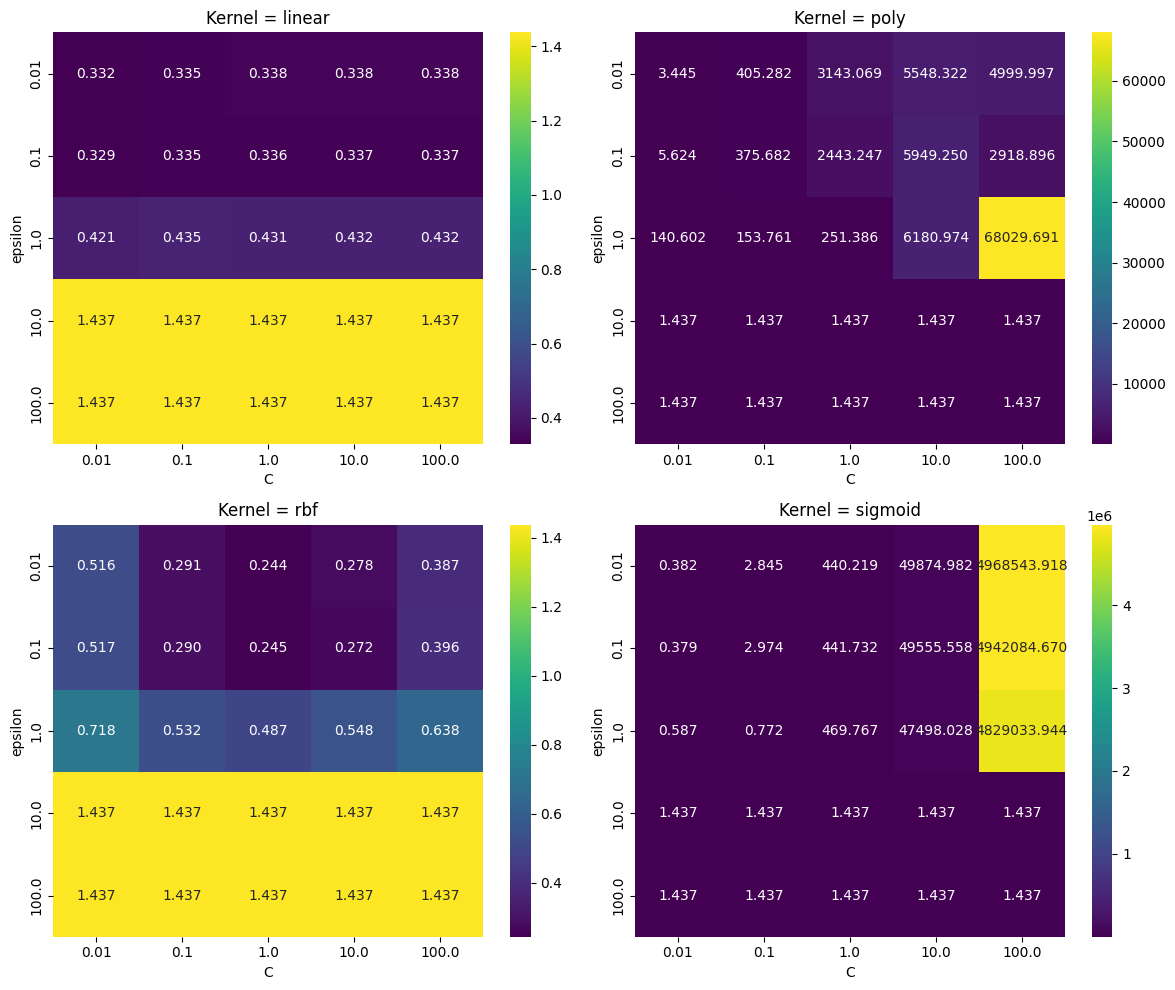

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ax, k in zip(axes.flat, kernels):
    data = df[df['kernel'] == k].pivot(index='epsilon', columns='C', values='MSE')
    sns.heatmap(data, annot=True, fmt=".3f", cmap='viridis', ax=ax)
    ax.set_title(f'Kernel = {k}')
    ax.set_xlabel('C')
    ax.set_ylabel('epsilon')

plt.tight_layout()
plt.show()


In [13]:
LinearSVR_res = []

for C in [0.01, 0.1, 1, 10, 100]:
    for epsilon in [0.01, 0.1, 1, 10, 100]:
        model = make_pipeline(StandardScaler(), LinearSVR(C = C, epsilon = epsilon, max_iter = 1000000))
        LinearSVR_res.append((
            C, epsilon,
            -fsum(cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error'))/5)
        )


In [14]:
LinearSVR_res

[(0.01, 0.01, 0.345028366131067),
 (0.01, 0.1, 0.34029624284858073),
 (0.01, 1, 0.49001614504946717),
 (0.01, 10, 4.613340004001399),
 (0.01, 100, 4.613340004001399),
 (0.1, 0.01, 0.3370967867020647),
 (0.1, 0.1, 0.3358438924167916),
 (0.1, 1, 0.4257682636389425),
 (0.1, 10, 4.613340004001399),
 (0.1, 100, 4.613340004001399),
 (1, 0.01, 0.3374119617897112),
 (1, 0.1, 0.336817395609171),
 (1, 1, 0.4344988707255785),
 (1, 10, 4.613340004001399),
 (1, 100, 4.613340004001399),
 (10, 0.01, 0.3386234258398599),
 (10, 0.1, 0.33690101423923335),
 (10, 1, 0.4315988458548167),
 (10, 10, 4.613340004001399),
 (10, 100, 4.613340004001399),
 (100, 0.01, 0.3380244894155603),
 (100, 0.1, 0.33669160534487313),
 (100, 1, 0.4316357952835926),
 (100, 10, 4.613340004001399),
 (100, 100, 4.613340004001399)]

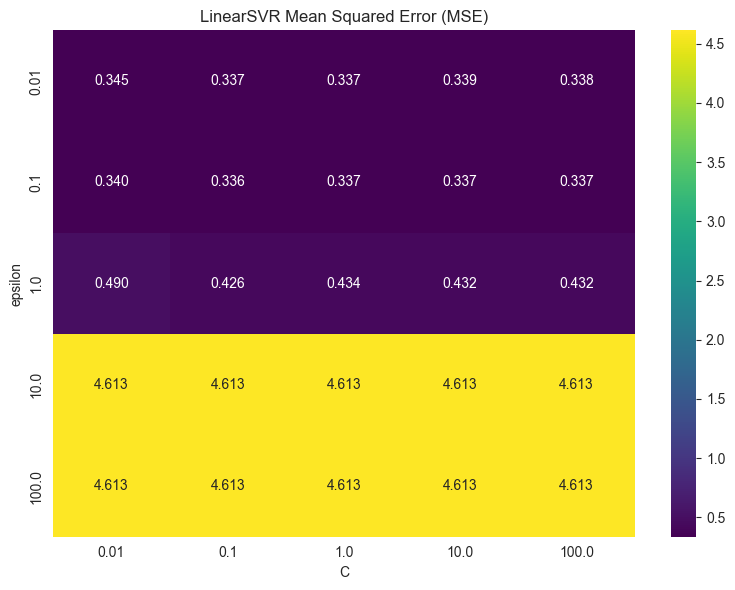

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(LinearSVR_res, columns=['C', 'epsilon', 'MSE'])

pivot_df = df.pivot(index='epsilon', columns='C', values='MSE')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap='viridis')
plt.title('LinearSVR Mean Squared Error (MSE)')
plt.xlabel('C')
plt.ylabel('epsilon')
plt.tight_layout()
plt.show()

In [16]:
# RBF kernel in SVR is still better than the linear

In [23]:
        SGDHinge_res = []


        model = make_pipeline(StandardScaler(), SGDRegressor(loss="epsilon_insensitive"))
        SGDHinge_res.append(
            -fsum(cross_val_score(model, X, y, cv=5,scoring='neg_mean_squared_error'))/5
        )


In [24]:
SGDHinge_res
# Very good result very quickly

[0.3420843802720454]

## Chapter 6. Decision Trees

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [15]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=["petal length (cm)", "petal width (cm)"], class_names=iris.target_names,
                rounded=True, filled=True)

In [4]:
from graphviz import Source

In [ ]:
from graphviz import Source

graph = Source.from_file(r"C:\Users\20106\PycharmProjects\Data-Science\iris_tree.dot")
graph.render(r"C:\Users\20106\PycharmProjects\Data-Science\iris_tree.dot", format="png", cleanup=True)  # Saves as PNG

In [11]:
# Decision trees don't require any feature scaling

In [12]:
"""
Gini index of node i (Gi) = 1 − [k=1∑n] (p{i,k} ^ 2)
"""

'\nGini index of node i (Gi) = 1 − [k=1∑n] (p{i,k} ^ 2)\n'

In [14]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |   

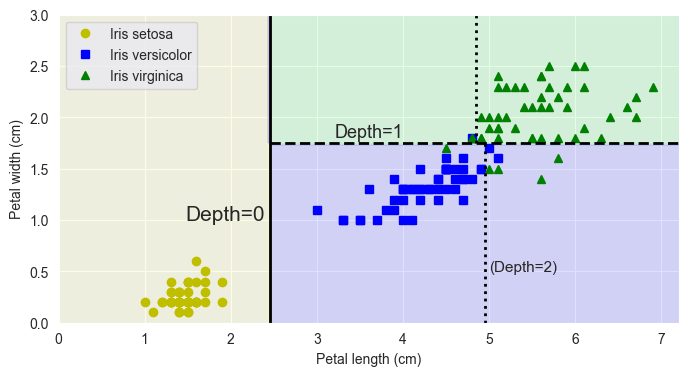

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

In [17]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [19]:
tree_clf.predict([[5, 1.5]])

array([1])

### The CART Training Algorithm

In [3]:
"""
معادلة الكارت التي تستخدمها الشجرة كاداة الحصول على افضل شكل لها
حجم النصف اليمين / الحجم الكلي * التلوث في النصف اليمين + حجم النص الشمال / الحجم الكلي * التلوث في النص الشمال
ازاي بتختار الحجم والصفة المستخدمة؟ ببساطة بالقوة الغام => جرب كل حاجه
يحاول تقليل هذه المعادلة
فيحاول أن يقلل التلوث؛ كما يحاول ايضا ان يقلل المضروب فيه؛ وكيف تقلل المضروب فيه؟ (النسب)
ان تقربها من النص؛ مثال:
هب ان معك 100 عينة؛ 60 من النوع أ و 40 من النوع ب قسمتها على طريقتين:
- 50 من أ + 5 من ب في المجموعة الاولى و 10 من أ و35 من ب في الثانية
Cart = .246
لكن انظر لو فضلنا في الحالة الثانية ان نجعل المجموعة الأولى تامة النقاء: 50 من أ و صفر من ب والثانية 10 من أ و 40 من ب
لاحظ ان الجيني في الاتنين هيقل لكن انظر الى الكارت
0.16
قل برده :D
ما علينا المهم انك فهمت
"""

'\nمعادلة الكارت التي تستخدمها الشجرة كاداة الحصول على افضل شكل لها\nحجم النصف اليمين / الحجم الكلي * التلوث في النصف اليمين + حجم النص الشمال / الحجم الكلي * التلوث في النص الشمال\nازاي بتختار الحجم والصفة المستخدمة؟ ببساطة بالقوة الغام => جرب كل حاجه\nيحاول تقليل هذه المعادلة\nفيحاول أن يقلل التلوث؛ كما يحاول ايضا ان يقلل المضروب فيه؛ وكيف تقلل المضروب فيه؟ (النسب)\nان تقربها من النص؛ مثال:\nهب ان معك 100 عينة؛ 60 من النوع أ و 40 من النوع ب قسمتها على طريقتين:\n- 50 من أ + 5 من ب في المجموعة الاولى و 10 من أ و35 من ب في الثانية\nCart = .246\nلكن انظر لو فضلنا في الحالة الثانية ان نجعل المجموعة الأولى تامة النقاء: 50 من أ و صفر من ب والثانية 10 من أ و 40 من ب\nلاحظ ان الجيني في الاتنين هيقل لكن انظر الى الكارت\n0.16\nقل برده :D\nما علينا المهم انك فهمت\n'

In [ ]:
"""
هل فيه خيار اخر غير ال gini entropy لحساب عد النقاوة في كل نود؟ اه
ممكن نستخدم ال entropy
H(i) = -p(i, j)*log(p(i, j)) for all classes j
هل فيه فرق؟ غالبا هيكونو نفس النتيجة = لكن الجيني اسرع بقليل
بعض الاحيان تجد ان الجيني يميل الى فصل الانواع الاكثر انتشارا وحدها؛ بينا الانتروبي يميل الى تكوين شجر اكثر توازنا
"""

In [1]:
"""
Decision trees:
* لا تفترض اي شيء للبيانات
* اكثر عرضة جدا لل اوفر فتتنج
* non parametric model =} ليس لأنها ليس لها بارامترز بل لأننا لا نعرف عدد البارامترز قبل البدء
"""

'\nDecision trees:\n* لا تفترض اي شيء للبيانات\n* اكثر عرضة جدا لل اوفر فتتنج\n* non parametric model =} ليس لأنها ليس لها بارامترز بل لأننا لا نعرف عدد البارامترز قبل البدء\n'

In [ ]:
"""
Increasing min_* hyperparameters or reducing max_* hyperparameters will
regularize the model.
"""

In [1]:
"""
طريقة اخرى لضمان ان تكون الشجرة معمولة من غير اوفر فتتنج انك ببساطة تسيبها تهجص للاخر => ثم تبدا في حذف الابناء اللي تحسينهم عن ابائهم كان مجرد صدفة (الفرضية الصفرية والاحتمال p)
"""

'\nطريقة اخرى لضمان ان تكون الشجرة معمولة من غير اوفر فتتنج انك ببساطة تسيبها تهجص للاخر => ثم تبدا في حذف الابناء اللي تحسينهم عن ابائهم كان مجرد صدفة (الفرضية الصفرية والاحتمال p)\n'

In [4]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [7]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test), tree_clf2.score(X_moons_test, y_moons_test)

(0.898, 0.92)

### Decision Tree Regression

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

In [9]:
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [10]:
"""
شرح الرسومات اللي في الكتاب لو نسيت
فكرة الريجيريشين بالشجرة بسيطة جدا
هتعمل نفس التقسيمة بناء على الخصائص ولو اصغر يروح في ناحية ولو اكبر في ناجية؛ ثم هيلاقي نفسه في نود؛ وهتكون القيمة المتوقعة بتاعته هي متوسط القيم التي وقعت في هذه النود من ذي قبل اثناء التمرين"""

'\nشرح الرسومات اللي في الكتاب لو نسيت\nفكرة الريجيريشين بالشجرة بسيطة جدا\nهتعمل نفس التقسيمة بناء على الخصائص ولو اصغر يروح في ناحية ولو اكبر في ناجية؛ ثم هيلاقي نفسه في نود؛ وهتكون القيمة المتوقعة بتاعته هي متوسط القيم التي وقعت في هذه النود من ذي قبل اثناء التمرين'

In [12]:
"""
بيقسم بناء على ايه؟ اللي هيقلل mse
فهو هيعدي على كل خصيصة ويجرب يقسمها بعدد تجارب معين هنشوف ازاي بيعرفه كمان شويه
ويحسب متوسط الخطا في كل مجموعة ثم يختار التي تقلل الخطا
الرسمة 6-5
الخطوط العرضية تمثل مجال كل مجموعة نهايئة؛ والخطا الافقي يمتد لمحور القيمة المتوقعة
تجد لما اقصى عمق كان 2 كان عدد الاوراق 4
ولما كان اقصى عمق 3 كان عدد الاوراق 8
مش شرط انا العملية تكون كده؛ بس صودف ان ده حصل يعني
"""

'\nبيقسم بناء على ايه؟ اللي هيقلل mse\nفهو هيعدي على كل خصيصة ويجرب يقسمها بعدد تجارب معين هنشوف ازاي بيعرفه كمان شويه\nويحسب متوسط الخطا في كل مجموعة ثم يختار التي تقلل الخطا\nالرسمة 6-5\nالخطوط العرضية تمثل مجال كل مجموعة نهايئة؛ والخطا الافقي يمتد لمحور القيمة المتوقعة\nتجد لما اقصى عمق كان 2 كان عدد الاوراق 4\nولما كان اقصى عمق 3 كان عدد الاوراق 8\nمش شرط انا العملية تكون كده؛ بس صودف ان ده حصل يعني\n'

### Sensitivity to Axis Orientation

In [13]:
"""
صاحبتنا تعشق التقسيمات العمودية على المحاور وهذا يجعلها تتاثر جدا بدوران البيانات
انظر الى الرسمة 6-7
العلاج يكون بصاحبنا القديم؛ ال PCA
"""

'\nصاحبتنا تعشق التقسيمات العمودية على المحاور وهذا يجعلها تتاثر جدا بدوران البيانات\nانظر الى الرسمة 6-7\n'

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pip = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pip.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Variance Problem

In [18]:
"""
تغيير بسيط جدا في البارامترز بتاعت الشجرة => تغيير كبير في الاداء
Scikit-Learn is stochastic—it randomly selects the set of features to evaluate at each node—even retraining the same decision tree on the exact same data may produce a very different model, such as the one represented in Figure 6-9 (unless you set the random_state hyperparameter). As you can see, it looks
very different from the previous decision tree (Figure 6-2).
"""

'\nتغيير بسيط جدا في البارامترز بتاعت الشجرة => تغيير كبير في الاداء\nScikit-Learn is stochastic—it randomly selects the set of features to evaluate at each node—even retraining the same decision tree on the exact same data may produce a very different model, such as the one represented in Figure 6-9 (unless you set the random_state hyperparameter). As you can see, it looks\nvery different from the previous decision tree (Figure 6-2).\n'

In [19]:
"""
العلاج؟ random_forest
average many trees => one of the most powerfult models available today
"""

'\nالعلاج؟ random_forest\naverage many trees => one of the most powerfult models available today\n'

ف## Chapter 10

# Data Science From Scratch

In [ ]:
dicty = {} # Pythonic
dicty = dict() # less Pythonic
gg = {"JOJ": 465, "AMR": 499}

In [ ]:
gg["JOJ"]

In [ ]:
gg["RYAD"]

In [ ]:
# To avoid the exception:
print(gg.get("RYAD"))

In [ ]:
gg["AMR"] = 499.5

In [ ]:
tweet = {
    "user" : "joelgrus",
    "text" : "Data Science is Awesome",
    "retweet_count" : 100,
    "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

In [ ]:
tweet_key = tweet.keys()
tweet_values = tweet.values()
tweet_items = tweet.items()

"user" in tweet_key # Pythonic
"user" in tweet # Pythonic

In [ ]:
"joelgrus" in tweet_values # SLOOOW (ENTA FAHEM LEH O(n))

In [ ]:
gg[[1,2,3]] = 0

In [ ]:
gg[(1,2,3)] = 0

In [ ]:
# Default dict
doc = ["LLIDGM", "GFBDFGH", "FDHG", "FGDHGF", "FGHFG","GFH","FGFGH"]

In [ ]:
from collections import defaultdict
word_c = defaultdict(int)

In [ ]:
for word in doc:
  word_c[word]+=1

In [ ]:
word_c

# Beyond the Basic Stuff

## Chapter II

In [ ]:
from pathlib import Path
Path('spam', 'bacon', 'eggs') # If on windows: WindowsPath('spam/bacon/eggs')

In [ ]:
Path.home()

In [ ]:
from pathlib import Path
import os
Path.cwd()

In [ ]:
os.chdir("..")

In [ ]:
Path.cwd()

In [ ]:
os.chdir("content")

In [ ]:
Path.cwd()

In [ ]:
dir *py